#Please install these libraries or update them for use at ease.

```
pip install statsmodels
pip install scikit-learn
pip install seaborn
pip install numpy
pip install pandas
pip install tensorflow
pip install tqdm
!pip install statsmodels
!pip install scikit-learn
!pip install seaborn
!pip install numpy
!pip install pandas
!pip install tensorflow
!pip install tqdm
```



#Data Processing

In [ ]:
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import acf, pacf
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.arima.model import ARIMA
import seaborn as sns
from statsmodels.stats.diagnostic import acorr_ljungbox
import numpy as np
from statsmodels.tsa.stattools import adfuller
import itertools
import statsmodels.api as sm
import tensorflow as tf
from sklearn import preprocessing
from tensorflow import keras
import pandas as pd
import statsmodels.api as sm
import math
import warnings
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from statsmodels.tsa.seasonal import seasonal_decompose
from keras.layers import Dense, Activation
from sklearn.metrics import mean_squared_error as mse
from keras.models import Sequential
import concurrent.futures
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [ ]:
#Constants
COUNTRIES =['Japan', 'France', 'Usa', 'Colombia', 'Sweden',"World"]
FILE_NAME= 'population_data_bis1.csv'

In [ ]:
def process_data(path, countries=[]):
    df = pd.read_csv(path)
    df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
    print(df.describe())
    df=df.set_index('Date')


    return df,np.log(df)
df,data = process_data(FILE_NAME,COUNTRIES)
data.columns
data.index.dtype

            Japan      France         Usa    Colombia      Sweden        World
count  272.000000  272.000000  272.000000  272.000000  272.000000   272.000000
mean   127.146508   63.163563  312.920162   44.142054    9.607097  7188.294299
std      0.905116    1.937443   15.657188    3.660393    0.542050   553.251380
min    124.477000   59.267000  283.960000   38.378407    8.884193  6237.511475
25%    126.873500   61.646500  299.383500   41.096611    9.102150  6702.949400
50%    127.399500   63.444500  314.272000   43.682850    9.503901  7194.906219
75%    127.793500   64.835750  327.878250   46.757171   10.122262  7685.472556
max    128.099000   65.946000  335.501000   51.093190   10.554692  8092.631929


dtype('<M8[ns]')

In [ ]:
data

Japan    France       Usa  Colombia    Sweden     World
Date                                                                  
2001-01-01  4.843494  4.082053  5.648833  3.647495  2.184274  8.738337
2001-02-01  4.844581  4.082559  5.649559  3.648568  2.184415  8.739422
2001-03-01  4.844030  4.083065  5.650311  3.649536  2.184605  8.740507
2001-04-01  4.844596  4.083621  5.651092  3.650608  2.184809  8.741592
2001-05-01  4.844274  4.084193  5.651907  3.651645  2.185112  8.742677
...              ...       ...       ...       ...       ...       ...
2023-04-01  4.824739  4.187638  5.813772  3.930211  2.354990  8.995777
2023-05-01  4.824121  4.187865  5.814169  3.931089  2.355262  8.996510
2023-06-01  4.824466  4.188138  5.814617  3.932001  2.355681  8.997243
2023-07-01  4.824788  4.188472  5.815112  3.932744  2.355968  8.997976
2023-08-01  4.824627  4.188836  5.815625  3.933651  2.356571  8.998709

[272 rows x 6 columns]

In [ ]:
data.describe()

Japan      France         Usa    Colombia      Sweden       World
count  272.000000  272.000000  272.000000  272.000000  272.000000  272.000000
mean     4.845315    4.145255    5.744688    3.784024    2.260931    8.877237
std      0.007153    0.030879    0.050419    0.082279    0.056039    0.077397
min      4.824121    4.082053    5.648833    3.647495    2.184274    8.738337
25%      4.843191    4.121416    5.701725    3.715926    2.208511    8.810303
50%      4.847328    4.150165    5.750259    3.776955    2.251702    8.881128
75%      4.850416    4.171857    5.792642    3.844967    2.314737    8.947087
max      4.852803    4.188836    5.815625    3.933651    2.356571    8.998709

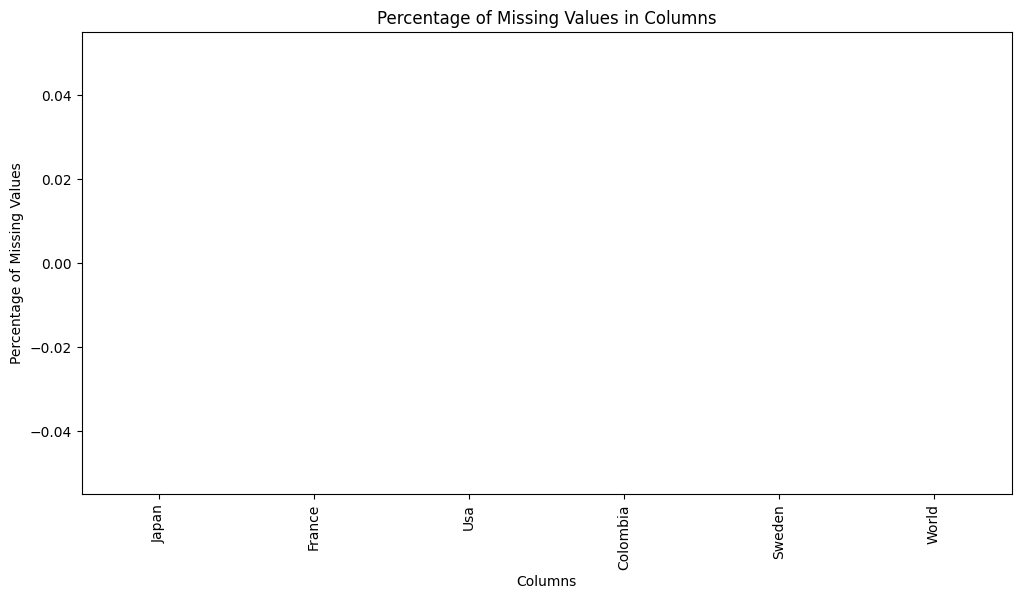

In [ ]:
def plot_nan_percentage(data):
    nan_percentage = (data.isnull().sum() / len(data)) * 100
    nan_percentage = nan_percentage[nan_percentage >=0]  # Filter out columns with no missing values

    # Plotting
    plt.figure(figsize=(12, 6))
    nan_percentage.sort_values(ascending=False).plot(kind='bar')
    plt.title('Percentage of Missing Values in Columns')
    plt.xlabel('Columns')
    plt.ylabel('Percentage of Missing Values')
    plt.show()


plot_nan_percentage(data)

Country : Japan, From 2001-01-01 00:00:00 to  2023-08-01 00:00:00
Country : France, From 2001-01-01 00:00:00 to  2023-08-01 00:00:00
Country : Usa, From 2001-01-01 00:00:00 to  2023-08-01 00:00:00
Country : Colombia, From 2001-01-01 00:00:00 to  2023-08-01 00:00:00
Country : Sweden, From 2001-01-01 00:00:00 to  2023-08-01 00:00:00
Country : World, From 2001-01-01 00:00:00 to  2023-08-01 00:00:00


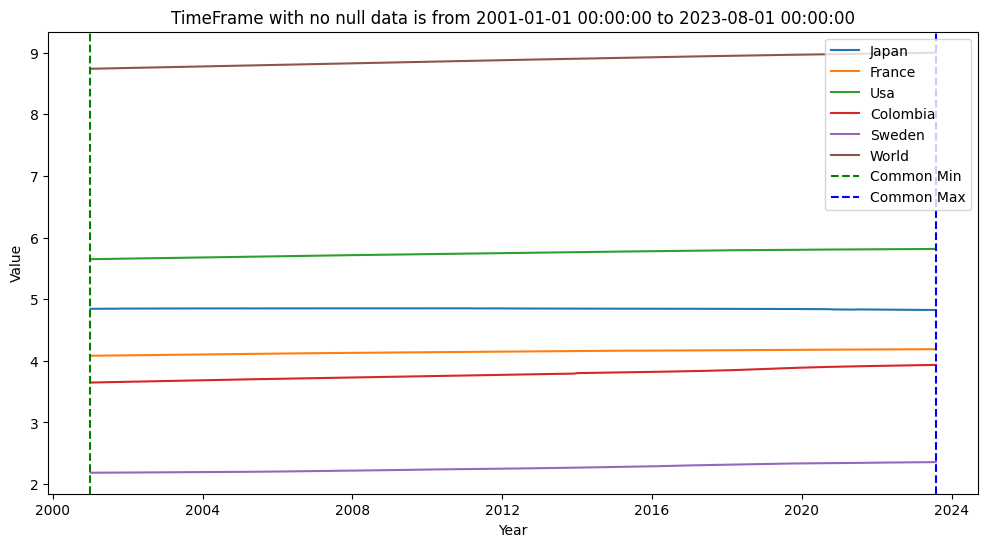

In [ ]:
def nan_intime(output):
    missing_data = output.isnull()

    # Find the common time frame (min and max)
    treshold=output.dropna()
    common_min = treshold.index.min()
    common_max = treshold.index.max()

    # Create a line plot with missing data highlighted
    plt.figure(figsize=(12, 6))

    for country in output.columns:
        plt.plot(output.index, output[country], label=country)

    # Highlight missing data in red
    for country in output.columns:
        plt.scatter(output.index[missing_data[country]], output[country][missing_data[country]], c='red', s=10)
        print(f'Country : {country}, From {output[country].dropna().index.min()} to  {output[country].dropna().index.max()}')

    # Add a vertical line for the common time frame
    plt.axvline(common_min, color='green', linestyle='--', label='Common Min')
    plt.axvline(common_max, color='blue', linestyle='--', label='Common Max')

    plt.xlabel('Year')
    plt.ylabel('Value')
    plt.title(f'TimeFrame with no null data is from {common_min} to {common_max}')
    plt.legend()

    plt.show()


# Example usage
nan_intime(data)


Country : Japan, From 2001-01-01 00:00:00 to  2023-08-01 00:00:00
Country : France, From 2001-01-01 00:00:00 to  2023-08-01 00:00:00
Country : Usa, From 2001-01-01 00:00:00 to  2023-08-01 00:00:00
Country : Colombia, From 2001-01-01 00:00:00 to  2023-08-01 00:00:00
Country : Sweden, From 2001-01-01 00:00:00 to  2023-08-01 00:00:00
Country : World, From 2001-01-01 00:00:00 to  2023-08-01 00:00:00


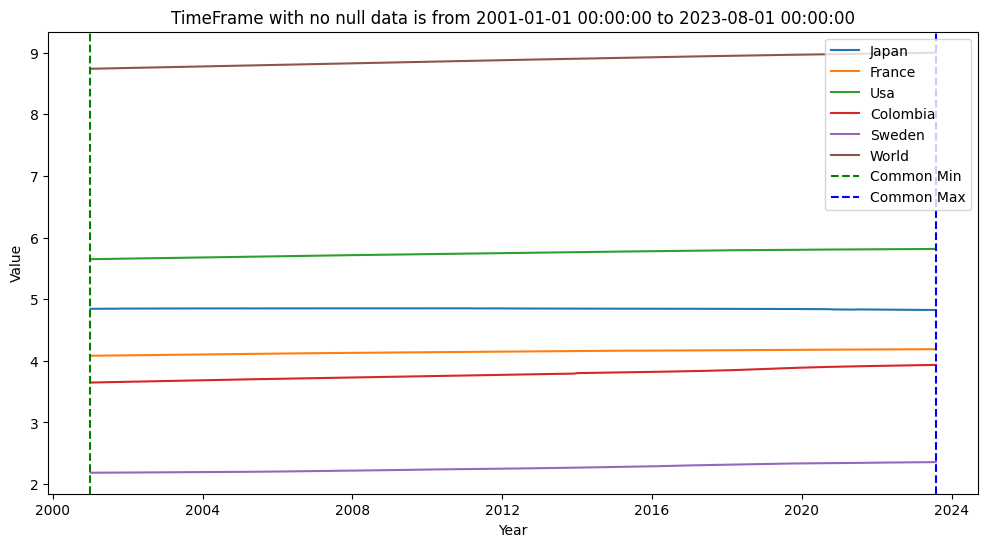

In [ ]:
import pandas as pd
import numpy as np

def replace_outliers_with_moving_average(data, window_size, z_score_threshold=3):
    """
    Replaces outliers in a DataFrame with the moving average.

    :param data: A pandas DataFrame with numerical data
    :param window_size: The window size for calculating the moving average
    :param z_score_threshold: The z-score threshold to identify outliers
    :return: DataFrame with outliers replaced by moving averages
    """
    # Create a copy of the data to avoid modifying the original DataFrame
    data_cleaned = data.copy()

    # Iterate through each column
    for column in data.columns:
        # Skip non-numeric columns
        if not np.issubdtype(data[column].dtype, np.number):
            continue

        # Calculate the moving average
        moving_avg = data[column].rolling(window=window_size, min_periods=1).mean()

        # Calculate the z-score for each value
        z_scores = np.abs((data[column] - data[column].mean()) / data[column].std())

        # Identify outliers
        outliers = z_scores > z_score_threshold

        # Replace outliers with moving average
        data_cleaned[column].where(~outliers, moving_avg, inplace=True)

    return data_cleaned
data = replace_outliers_with_moving_average(data,12)
nan_intime(data)


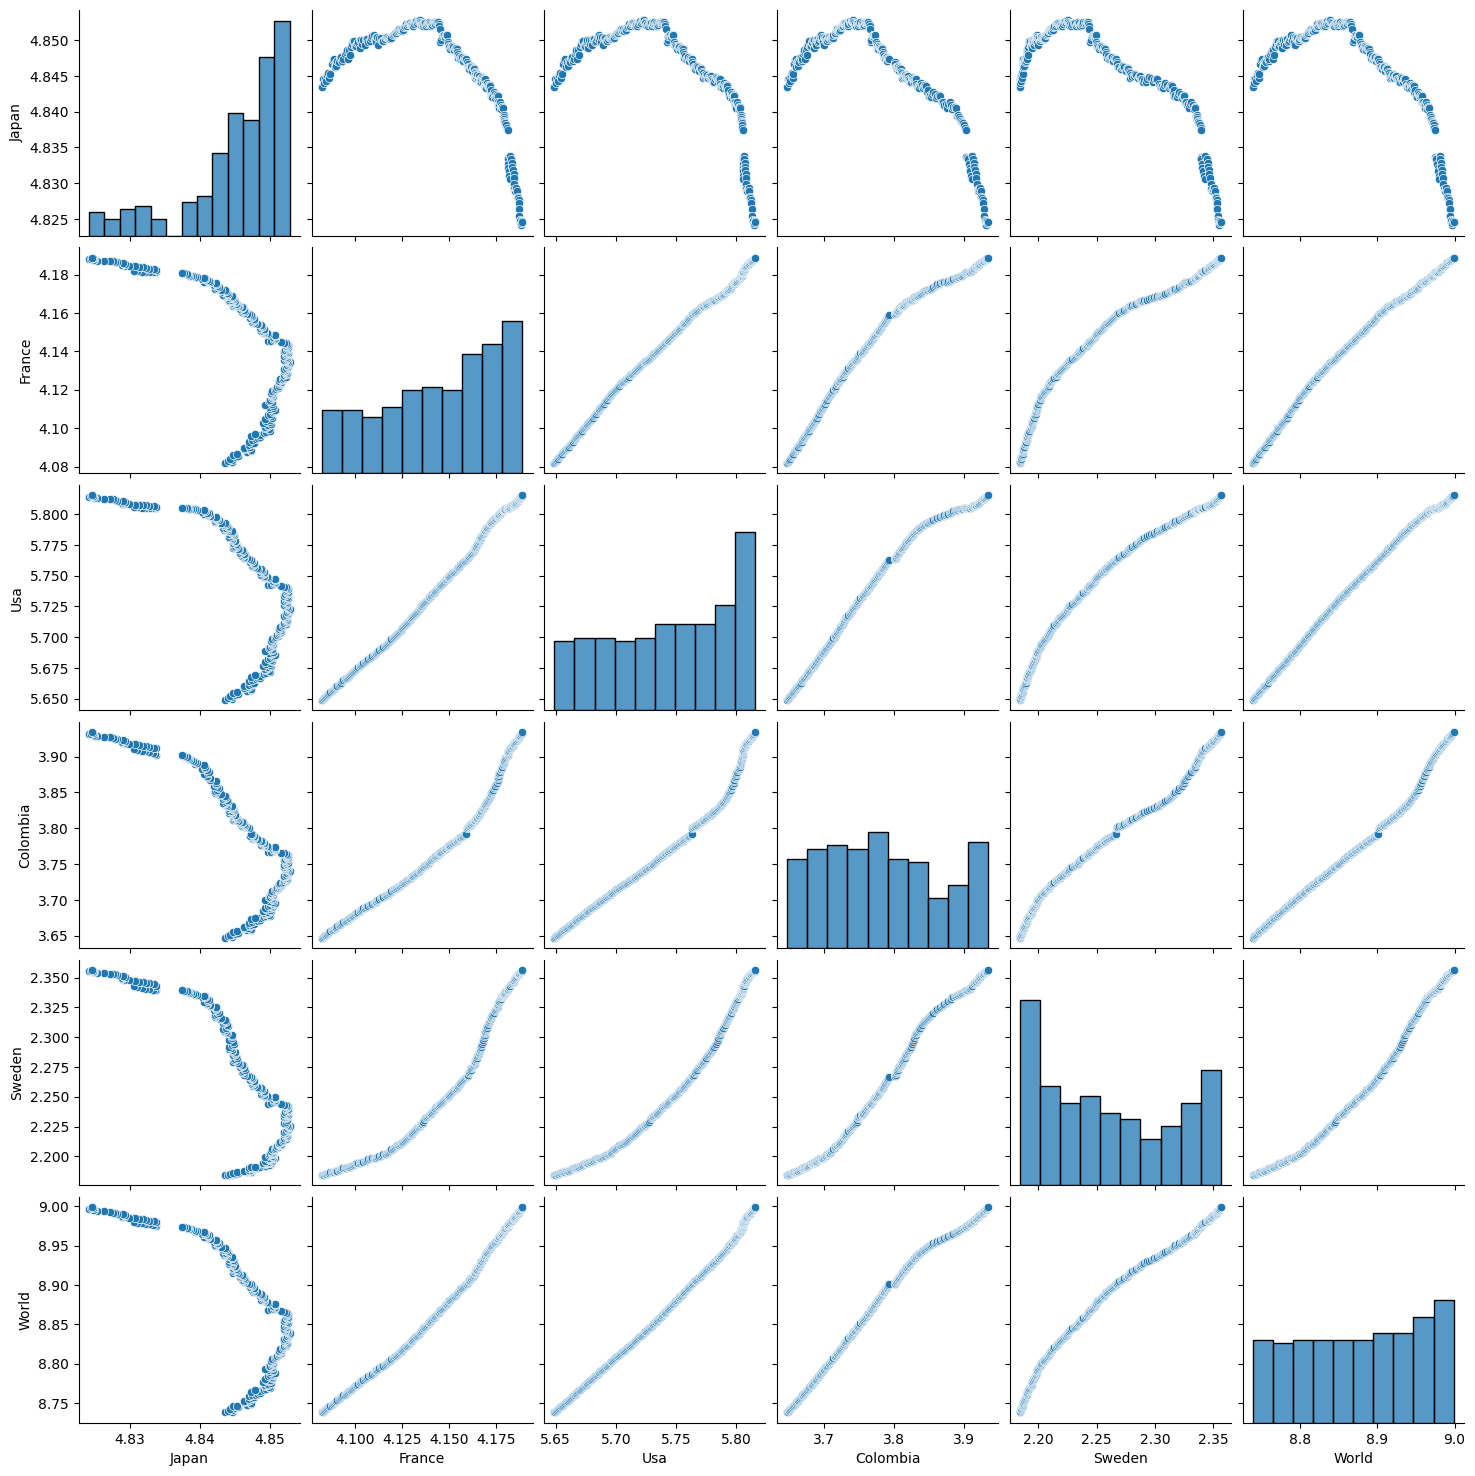

In [ ]:
sns.pairplot(data)

# Check the series for stationnarity and determine d orders




In [ ]:

def determine_differencing_order_for_all(data):
    stat={}
    for column in data.columns:
        series = data[column].dropna()
        d = 0

        while True:
            # Perform Augmented Dickey-Fuller test for stationarity
            result = adfuller(series)

            print(f"Results for column '{column}' (I({d})):")
            print(f"ADF Statistic: {result[0]}")
            print(f"P-Value: {result[1]}")
            print("Critical Values:")
            for key, value in result[4].items():
                print(f"  {key}: {value}")

            if result[1] <= 0.05:
                print(f"Series '{column}' is stationary at order I({d}) (reject null hypothesis)")
                break
            else:
                print(f"Series '{column}' is non-stationary at order I({d}) (fail to reject null hypothesis)")
                d += 1
                series = series.diff().dropna()  # Differencing the series
            print('\n')
        stat[column]=d

    return(stat)
# Example usage:
# Assuming you have a DataFrame 'data' with columns containing time series data
orders =determine_differencing_order_for_all(data)


Results for column 'Japan' (I(0)):
ADF Statistic: 1.7312870782013567
P-Value: 0.9982025396450241
Critical Values:
  1%: -3.4558530692911504
  5%: -2.872764881778665
  10%: -2.572751643088207
Series 'Japan' is non-stationary at order I(0) (fail to reject null hypothesis)


Results for column 'Japan' (I(1)):
ADF Statistic: -2.307306711356542
P-Value: 0.16962223991850134
Critical Values:
  1%: -3.4558530692911504
  5%: -2.872764881778665
  10%: -2.572751643088207
Series 'Japan' is non-stationary at order I(1) (fail to reject null hypothesis)


Results for column 'Japan' (I(2)):
ADF Statistic: -11.370436025744139
P-Value: 9.007186613049809e-21
Critical Values:
  1%: -3.455952927706342
  5%: -2.8728086526320302
  10%: -2.572774990685656
Series 'Japan' is stationary at order I(2) (reject null hypothesis)
Results for column 'France' (I(0)):
ADF Statistic: -3.321822848094094
P-Value: 0.013930731409231198
Critical Values:
  1%: -3.4562572510874396
  5%: -2.8729420379793598
  10%: -2.57284613994

In [ ]:
data.isna().sum()

Japan       0
France      0
Usa         0
Colombia    0
Sweden      0
World       0
dtype: int64

#  Decompose the series and study the seasonaility


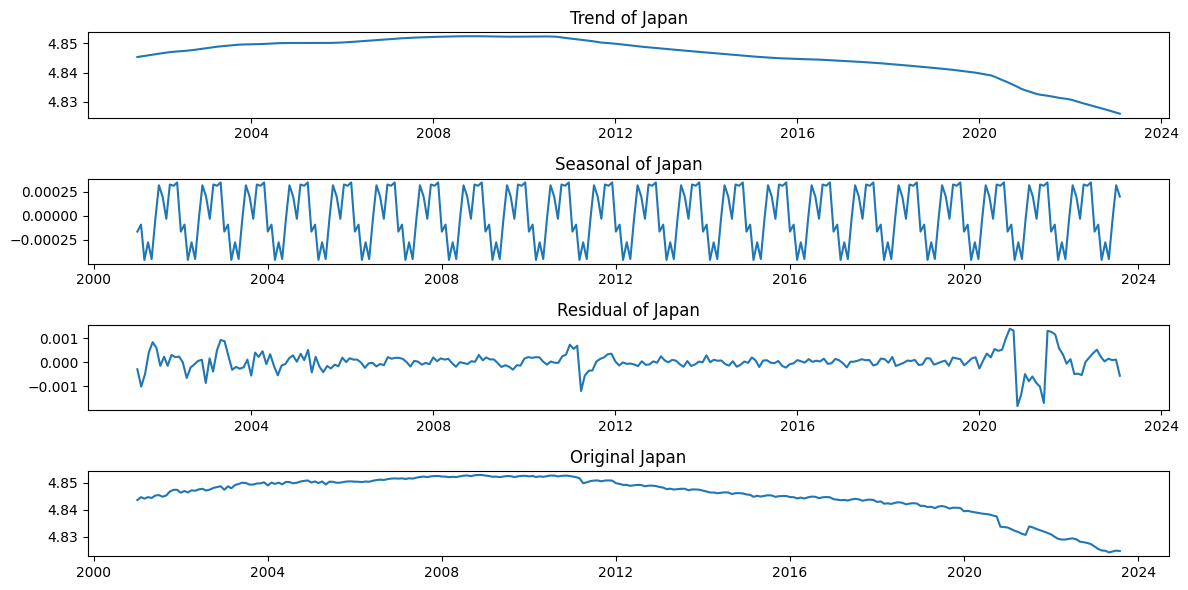

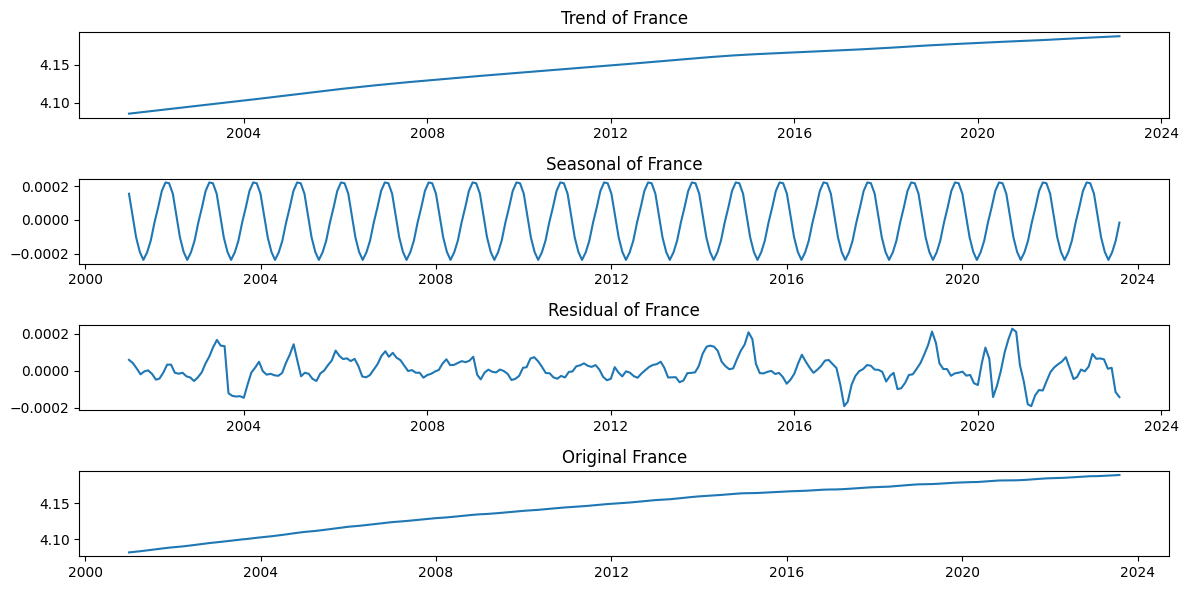

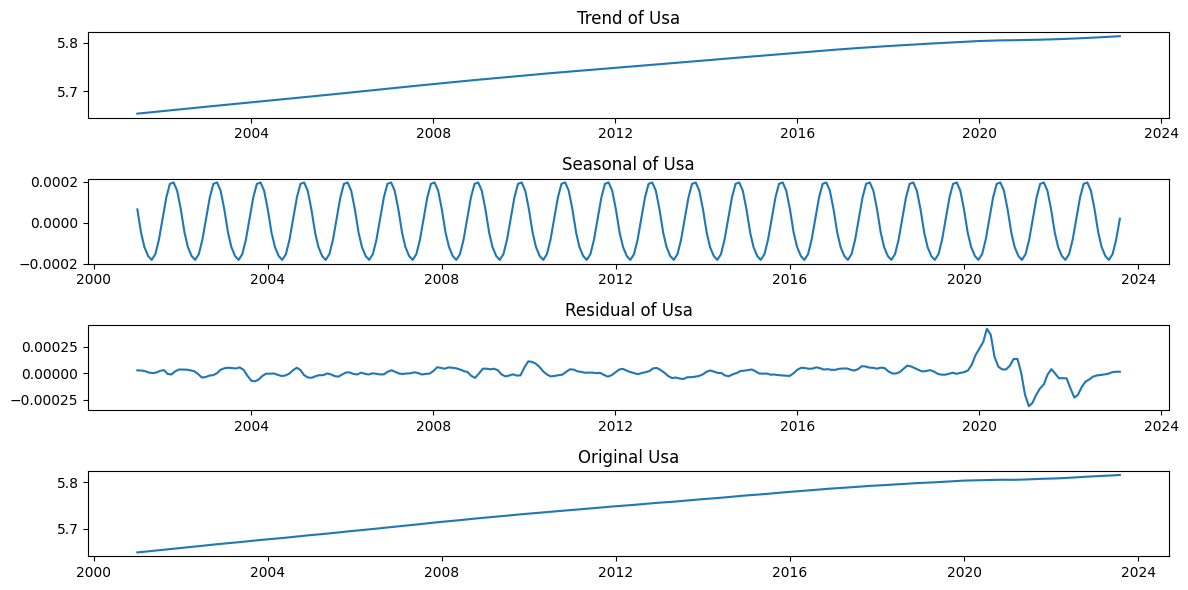

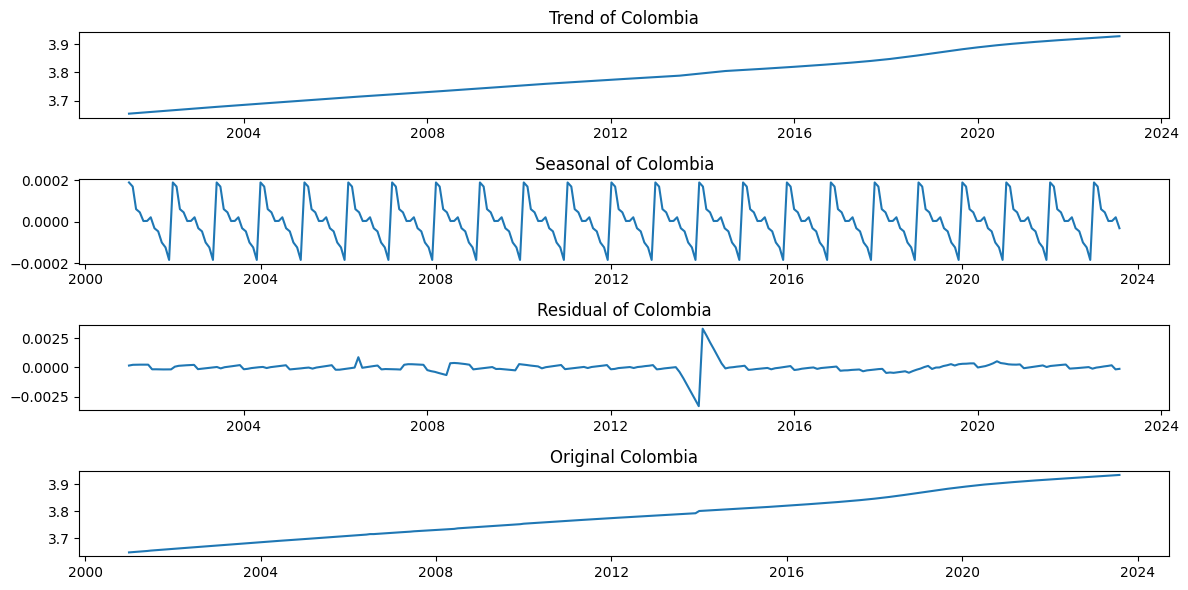

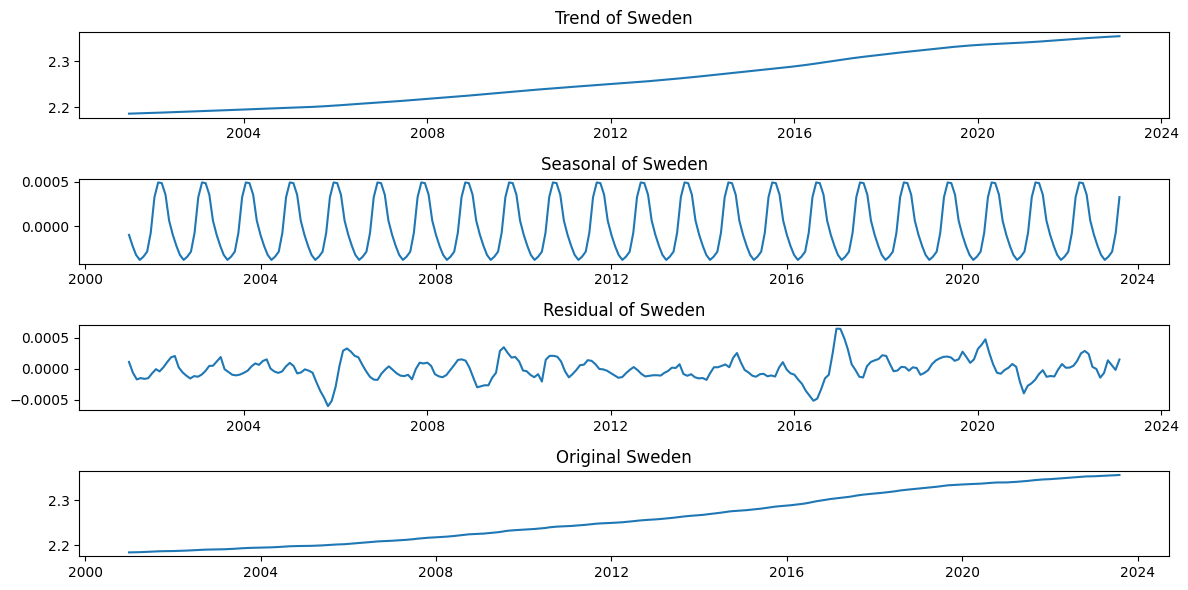

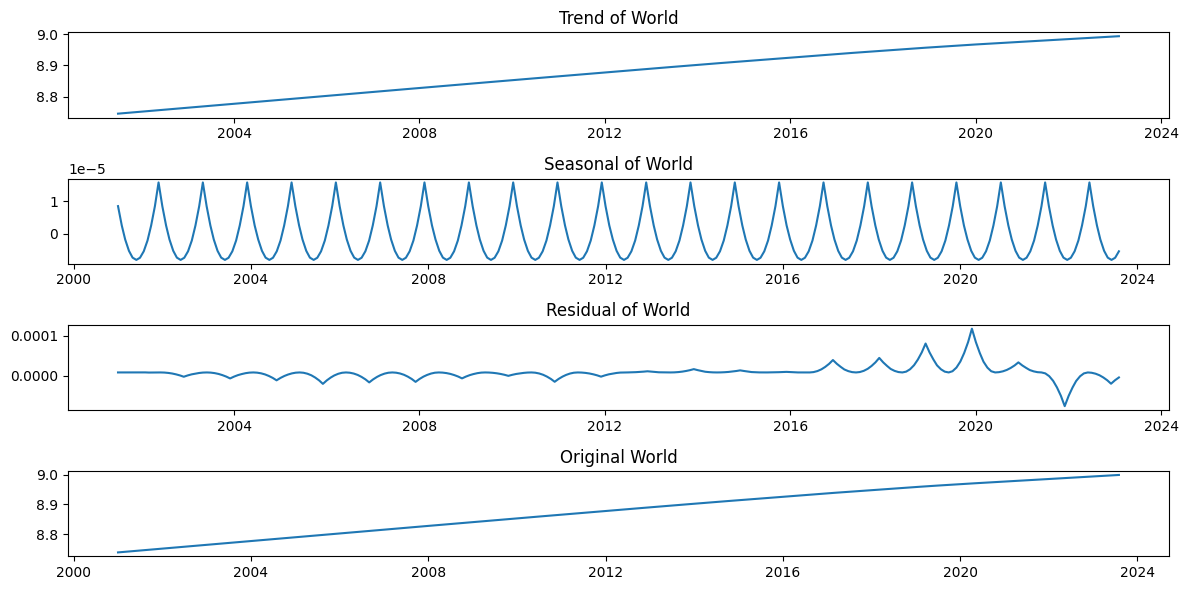

In [ ]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

def decompose_data(data, freq='M'):
    decomposed_data = {}
    dec_trend = pd.DataFrame()

    for column in data.columns:
        # Ensure the data index is a DatetimeIndex
        if not isinstance(data.index, pd.DatetimeIndex):
            raise ValueError("Data index must be a DatetimeIndex.")

        # Drop NA values and set the frequency
        series = data[column]

        # Decompose the time series
        decomposition = sm.tsa.seasonal_decompose(series, model='additive')
        dec_trend[column] = decomposition.trend

        # Store the decomposition components in a dictionary
        decomposed_data[column] = {
            'trend': decomposition.trend,
            'seasonal': decomposition.seasonal,
            'residual': decomposition.resid
        }

        # Visualize the decomposed components
        plt.figure(figsize=(12, 6))
        plt.subplot(411)
        plt.plot(decomposed_data[column]['trend'])
        plt.title(f'Trend of {column}')
        plt.subplot(412)
        plt.plot(decomposed_data[column]['seasonal'])
        plt.title(f'Seasonal of {column}')
        plt.subplot(413)
        plt.plot(decomposed_data[column]['residual'])
        plt.title(f'Residual of {column}')
        plt.subplot(414)
        plt.plot(data[column])
        plt.title(f'Original {column}')
        plt.tight_layout()
        plt.show()

    return dec_trend

# Example usage
decomposed_data = decompose_data(data, freq='M')  # 'M' for monthly frequency


#Fit a AR(1)


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

def ARIMA_forecast(data, best_orders, cutoff=None):
    if cutoff is None:
        cutoff_date = pd.to_datetime('2020-03-01')
    else:
        cutoff_date = pd.to_datetime(cutoff)

    arima_models = {}
    training = pd.DataFrame()
    testing = pd.DataFrame()
    predictions = pd.DataFrame()
    population_gap = pd.DataFrame()
    metrics = pd.DataFrame(columns=['Country', 'MSE', 'RMSE', 'MAE', 'MAPE', 'Bias'])

    for column, order in best_orders.items():
        series = data[column]
        p, d, q = order

        # Split the data into training and testing
        training_data = series[series.index <= cutoff_date]
        testing_data = series[series.index > cutoff_date]

        training[column] = training_data
        testing[column] = testing_data

        try:
            # Fit an ARIMA model and generate predictions
            model = ARIMA(training_data, order=order)
            arima_model = model.fit()
            arima_models[column] = arima_model
            forecasted_values = arima_model.predict(start=testing_data.index[0], end=testing_data.index[-1])
            predictions[column] = forecasted_values

            # Calculate error metrics
            mse = mean_squared_error(testing_data, forecasted_values)
            rmse = np.sqrt(mse)
            mae = mean_absolute_error(testing_data, forecasted_values)
            mape = np.mean(np.abs((testing_data - forecasted_values) / testing_data)) * 100
            bias = np.mean(forecasted_values - testing_data)

            # Append metrics to DataFrame
            metrics = metrics.append({'Country': column, 'MSE': mse, 'RMSE': rmse, 'MAE': mae, 'MAPE': mape, 'Bias': bias}, ignore_index=True)

            # Calculate and store population gap
            gap = testing_data - forecasted_values
            population_gap[column] = gap

        except Exception as e:
            print(f"Error fitting ARIMA model for {column}: {e}")

    return arima_models, population_gap, metrics
def analyze_arima_orders(data, stationnarity_orders,max_lags=120, acf_pacf_lags=120 ):
    """
    Analyze and find the best ARIMA orders for each column in a DataFrame based on ACF and PACF.

    :param data: A pandas DataFrame with time series data
    :param max_lags: The maximum number of lags to consider for finding the best ARIMA order
    :param acf_pacf_lags: Number of lags to show in ACF and PACF plots
    :return: Dictionary with the best ARIMA orders for each column
    """
    best_orders = {}

    for column in data.columns:
        time_series = data[column]

        # ACF and PACF plots
        plt.figure(figsize=(12, 6))
        plt.subplot(121)
        sm.graphics.tsa.plot_acf(time_series, lags=acf_pacf_lags, ax=plt.gca())
        plt.title(f'ACF for {column}')

        plt.subplot(122)
        sm.graphics.tsa.plot_pacf(time_series, lags=acf_pacf_lags, ax=plt.gca())
        plt.title(f'PACF for {column}')
        plt.show()

        # Find the best ARIMA order
        lag_acf = acf(time_series, nlags=max_lags)
        lag_pacf = pacf(time_series, nlags=max_lags, method='ols')

        p = next((x for x, val in enumerate(lag_pacf) if val < abs(0.6)), 0)
        q = next((x for x, val in enumerate(lag_acf) if val < abs(0.6)), 0)

        best_orders[column] = (p, stationnarity_orders.get(column,0), q)  # Assuming d=0 for simplicity

    return best_orders

In [ ]:
data_d_orders = determine_differencing_order_for_all(data)
data_d_orders
best_ar_1_orders= {}
# Plot the predictions and observed test data for every country


Results for column 'Japan' (I(0)):
ADF Statistic: 1.7312870782013567
P-Value: 0.9982025396450241
Critical Values:
  1%: -3.4558530692911504
  5%: -2.872764881778665
  10%: -2.572751643088207
Series 'Japan' is non-stationary at order I(0) (fail to reject null hypothesis)


Results for column 'Japan' (I(1)):
ADF Statistic: -2.307306711356542
P-Value: 0.16962223991850134
Critical Values:
  1%: -3.4558530692911504
  5%: -2.872764881778665
  10%: -2.572751643088207
Series 'Japan' is non-stationary at order I(1) (fail to reject null hypothesis)


Results for column 'Japan' (I(2)):
ADF Statistic: -11.370436025744139
P-Value: 9.007186613049809e-21
Critical Values:
  1%: -3.455952927706342
  5%: -2.8728086526320302
  10%: -2.572774990685656
Series 'Japan' is stationary at order I(2) (reject null hypothesis)
Results for column 'France' (I(0)):
ADF Statistic: -3.321822848094094
P-Value: 0.013930731409231198
Critical Values:
  1%: -3.4562572510874396
  5%: -2.8729420379793598
  10%: -2.57284613994

In [ ]:
warnings.filterwarnings('ignore')

best_ar_1_orders={}
for i in data_d_orders:
  best_ar_1_orders[i]=(1,data_d_orders.get(i,0),0)


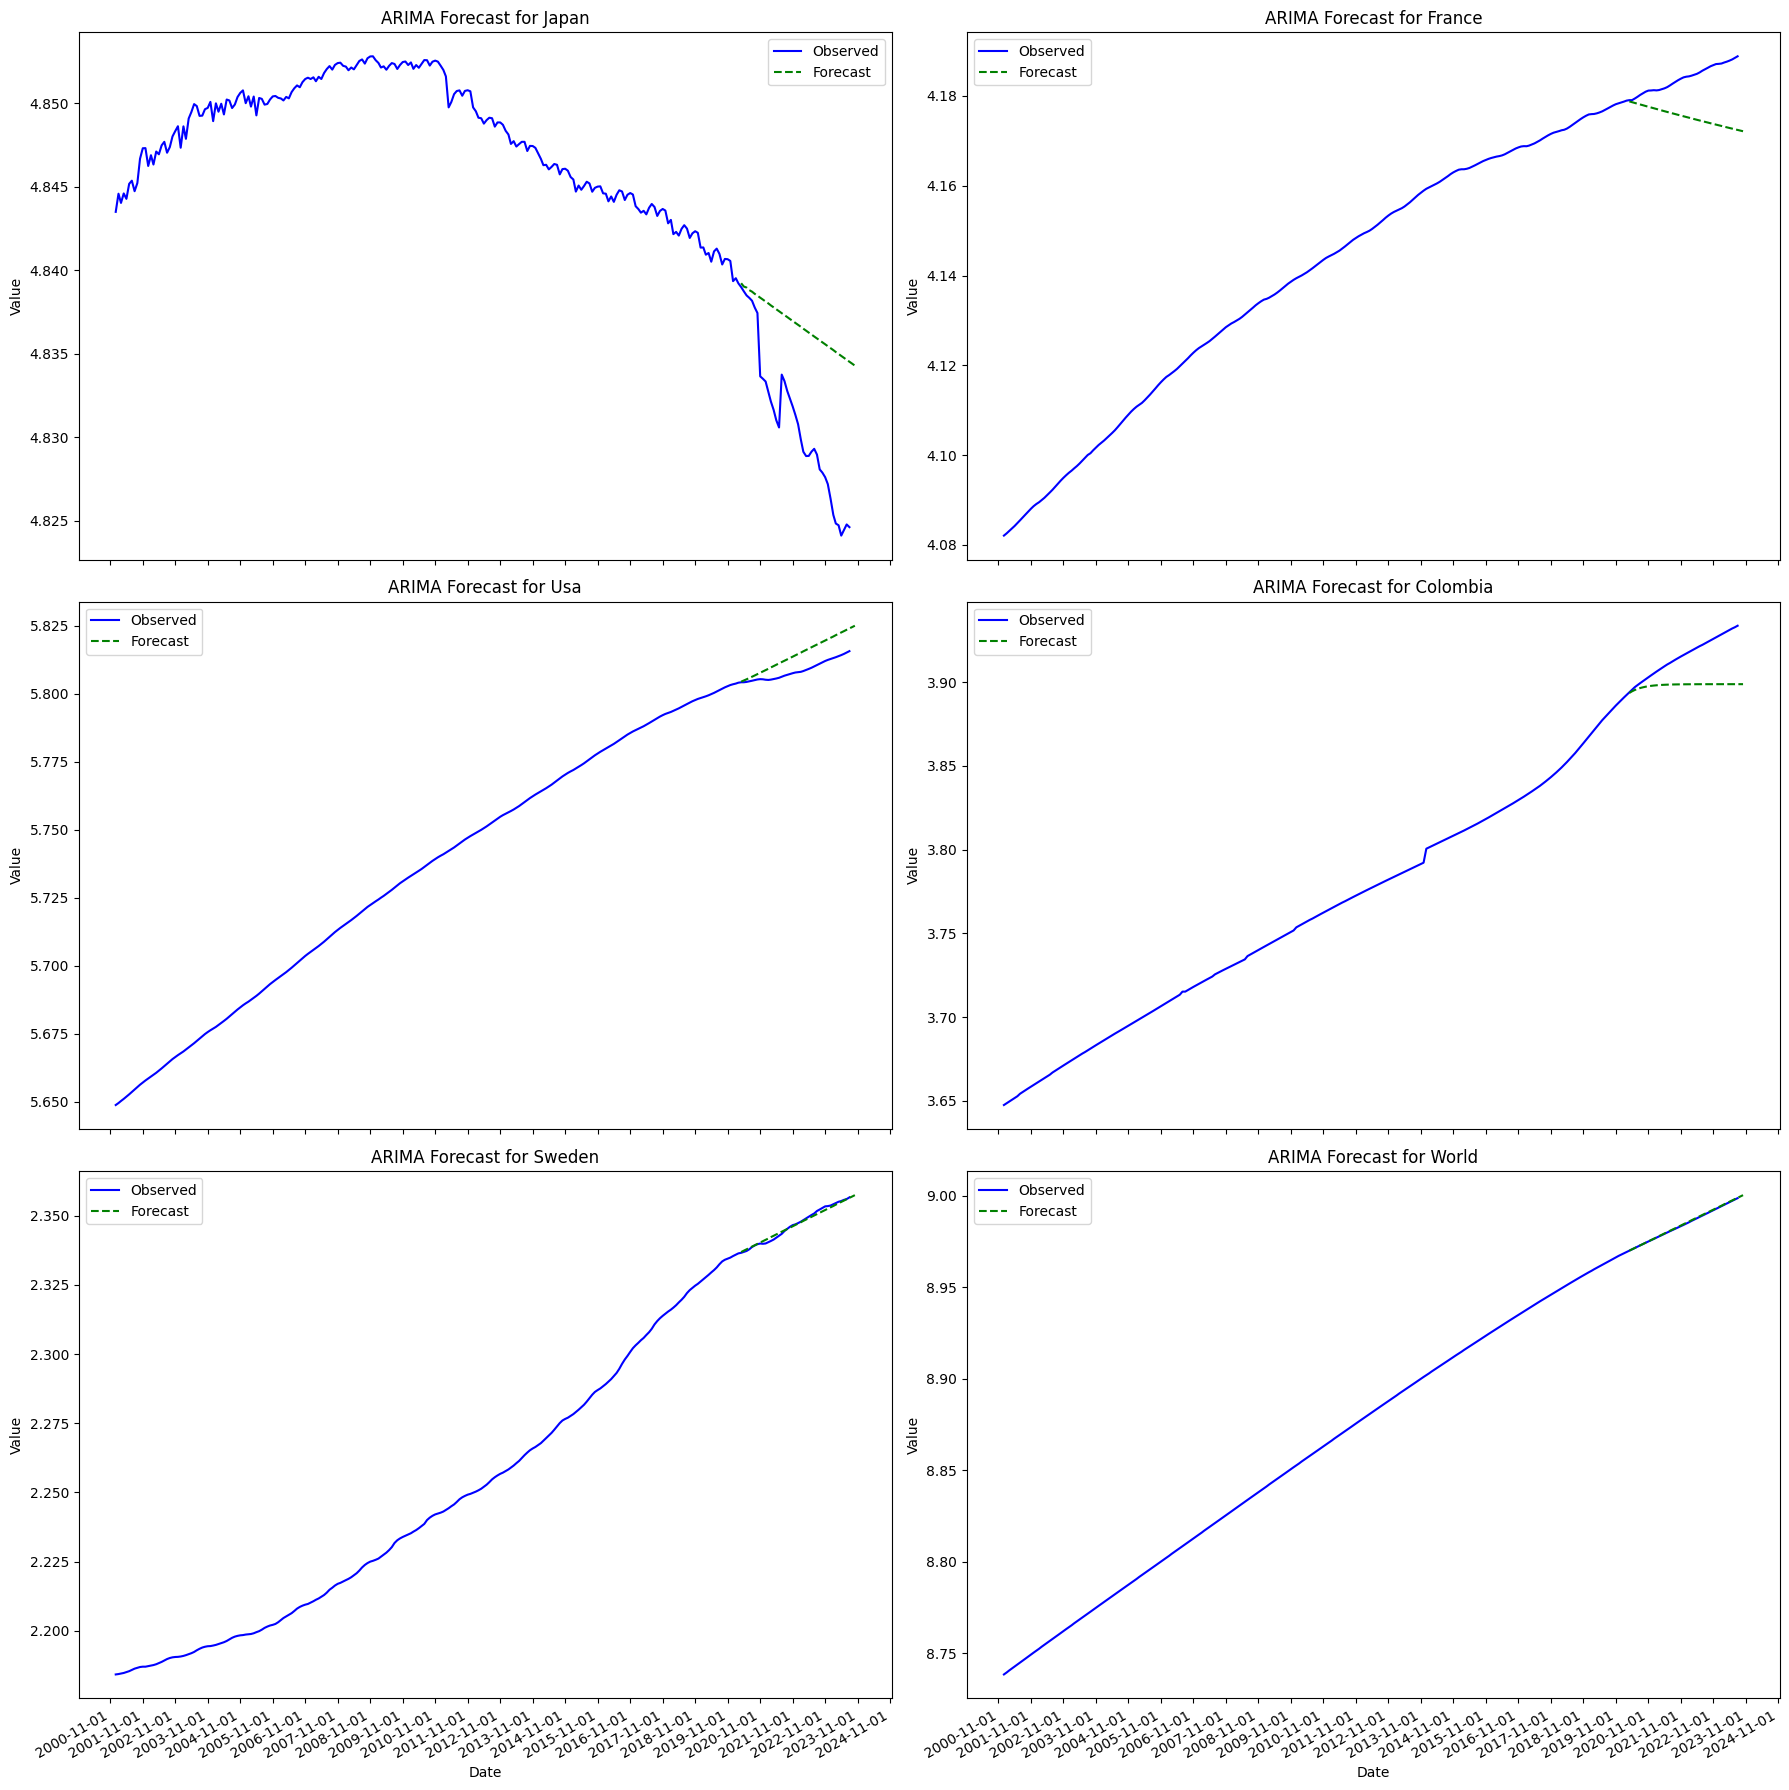

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import math

# Assuming 'arima_models' is your dictionary of ARIMA models and 'data' is your DataFrame
arima_models, pop_gap_ar_1, errors_ar1 = ARIMA_forecast(data, best_ar_1_orders, cutoff='2020-03-01')

num_countries = len(arima_models.keys())
num_cols = 2
num_rows = math.ceil(num_countries / num_cols)

plt.figure(figsize=(18, 6 * num_rows))

for idx, (column, arima_model) in enumerate(arima_models.items(), 1):
    # Forecast future values
    predictions = arima_model.forecast(steps=43)

    # Create subplot
    plt.subplot(num_rows, num_cols, idx)

    # Plot observed data
    plt.plot(data.index, data[column], label='Observed', color='blue')

    # Plot forecasted data
    plt.plot(predictions.index, predictions, label='Forecast', linestyle='--', color='green')

    # Formatting plot
    plt.title(f'ARIMA Forecast for {column}')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.legend()
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=12))
    plt.gcf().autofmt_xdate()  # Rotate date labels

plt.tight_layout()
plt.show()


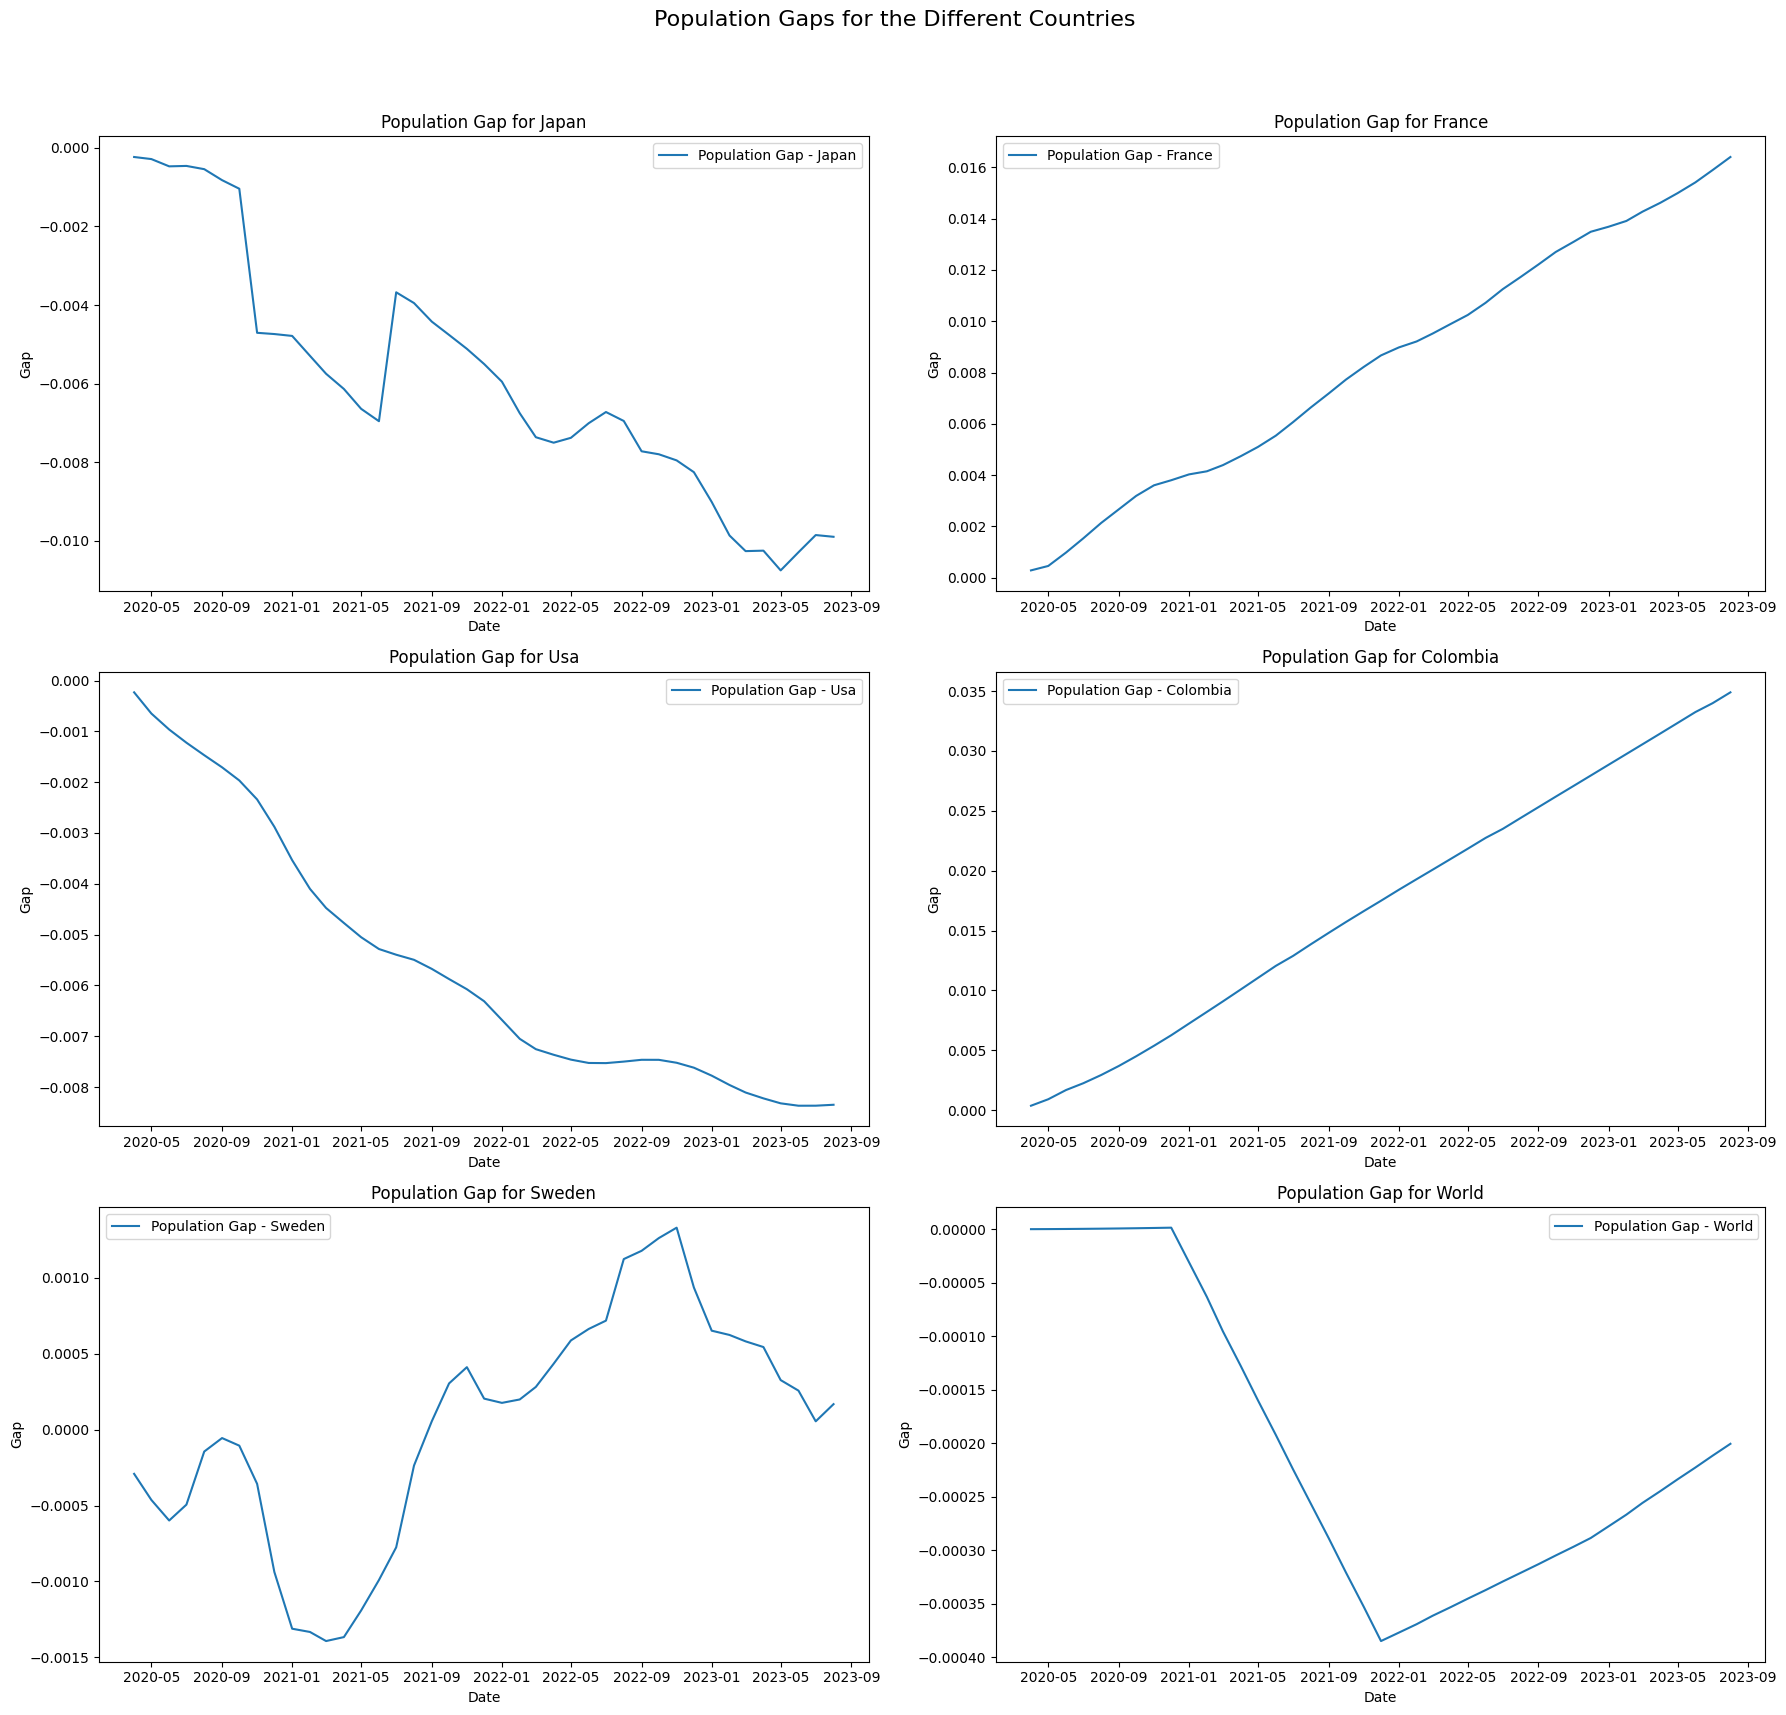

In [ ]:
import matplotlib.pyplot as plt
import math
import pandas as pd

# Assuming 'pop_gap_ar_1' is your DataFrame with population gaps for different countries
num_countries = len(pop_gap_ar_1.columns)
num_cols = 2
num_rows = math.ceil(num_countries / num_cols)

plt.figure(figsize=(18, 6 * num_rows))

for idx, column in enumerate(pop_gap_ar_1.columns, 1):
    plt.subplot(num_rows, num_cols, idx)
    plt.plot(pop_gap_ar_1.index, pop_gap_ar_1[column], label=f'Population Gap - {column}')
    plt.title(f'Population Gap for {column}')
    plt.xlabel('Date')
    plt.ylabel('Gap')
    plt.legend()

plt.suptitle('Population Gaps for the Different Countries', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust the layout to make room for the main title
plt.show()


In [ ]:
errors_ar1

Country           MSE      RMSE       MAE      MAPE      Bias
0     Japan  4.475344e-05  0.006690  0.005947  0.123156  0.005947
1    France  9.278912e-05  0.009633  0.008374  0.200061 -0.008374
2       Usa  5.187554e-05  0.007202  0.006521  0.112240  0.006521
3  Colombia  4.096837e-04  0.020241  0.017314  0.441430 -0.017314
4    Sweden  5.561803e-07  0.000746  0.000613  0.026116 -0.000025
5     World  1.596820e-07  0.000400  0.000335  0.003723  0.000335

# Fitting an ARIMA (p,d,q)





Results for column 'Japan' (I(0)):
ADF Statistic: 1.7312870782013567
P-Value: 0.9982025396450241
Critical Values:
  1%: -3.4558530692911504
  5%: -2.872764881778665
  10%: -2.572751643088207
Series 'Japan' is non-stationary at order I(0) (fail to reject null hypothesis)


Results for column 'Japan' (I(1)):
ADF Statistic: -2.307306711356542
P-Value: 0.16962223991850134
Critical Values:
  1%: -3.4558530692911504
  5%: -2.872764881778665
  10%: -2.572751643088207
Series 'Japan' is non-stationary at order I(1) (fail to reject null hypothesis)


Results for column 'Japan' (I(2)):
ADF Statistic: -11.370436025744139
P-Value: 9.007186613049809e-21
Critical Values:
  1%: -3.455952927706342
  5%: -2.8728086526320302
  10%: -2.572774990685656
Series 'Japan' is stationary at order I(2) (reject null hypothesis)
Results for column 'France' (I(0)):
ADF Statistic: -3.321822848094094
P-Value: 0.013930731409231198
Critical Values:
  1%: -3.4562572510874396
  5%: -2.8729420379793598
  10%: -2.57284613994

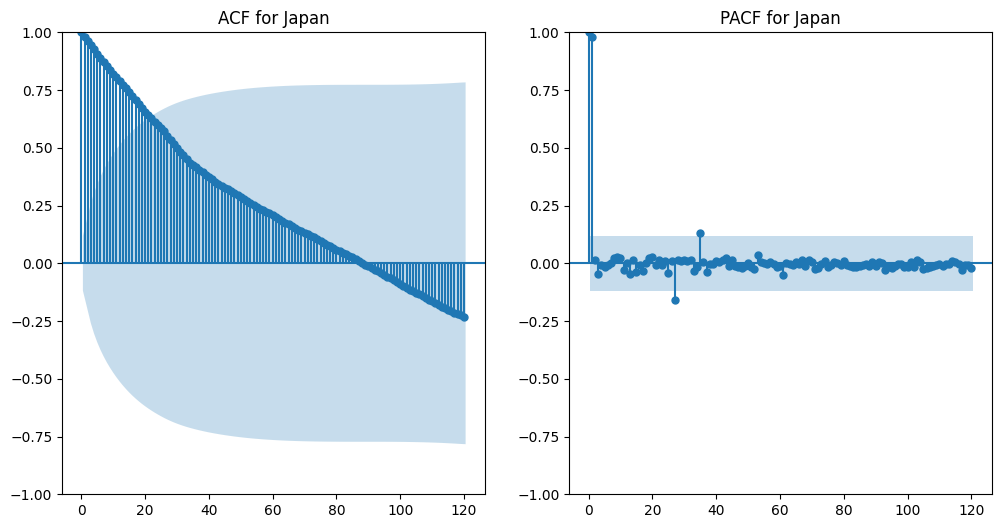

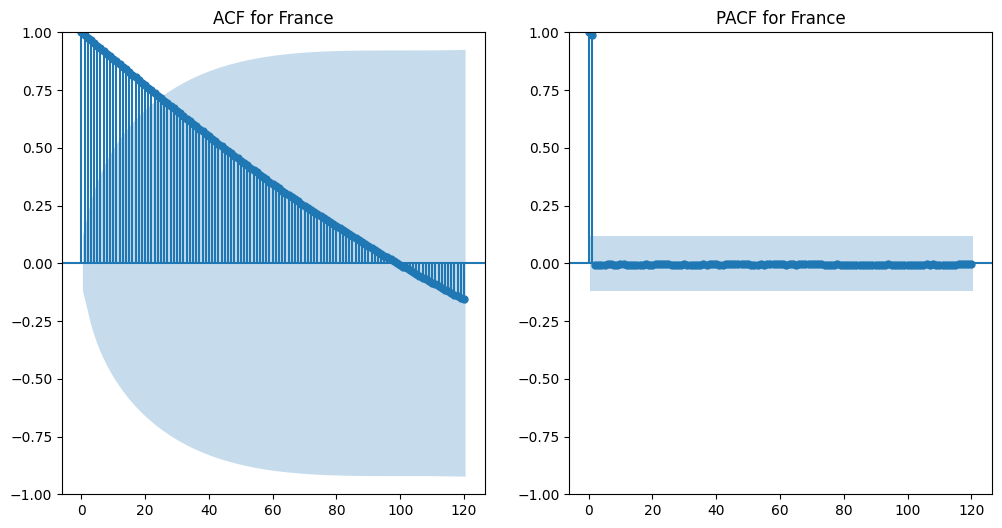

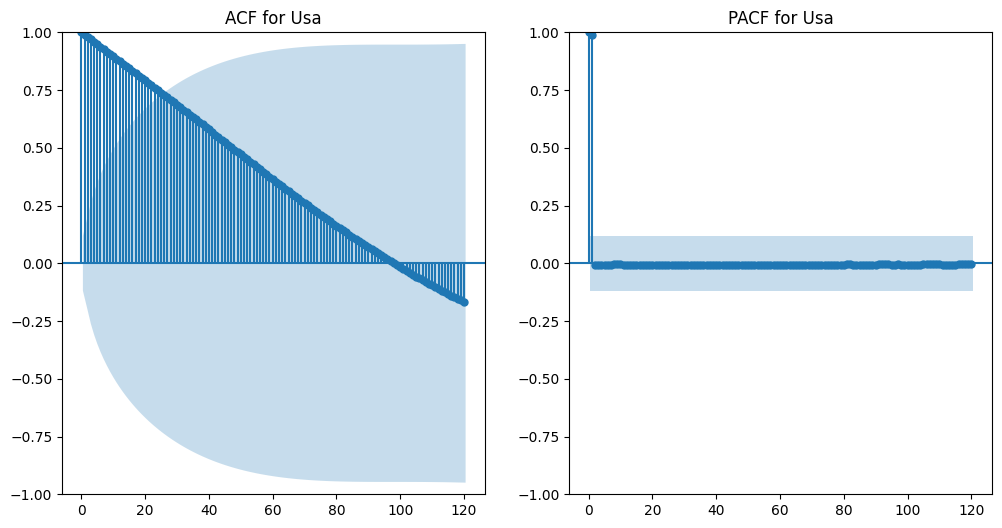

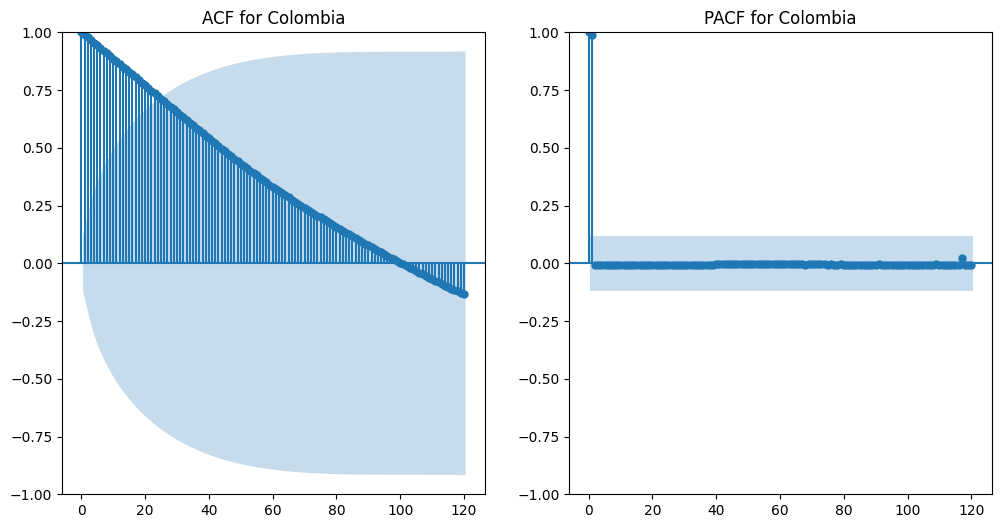

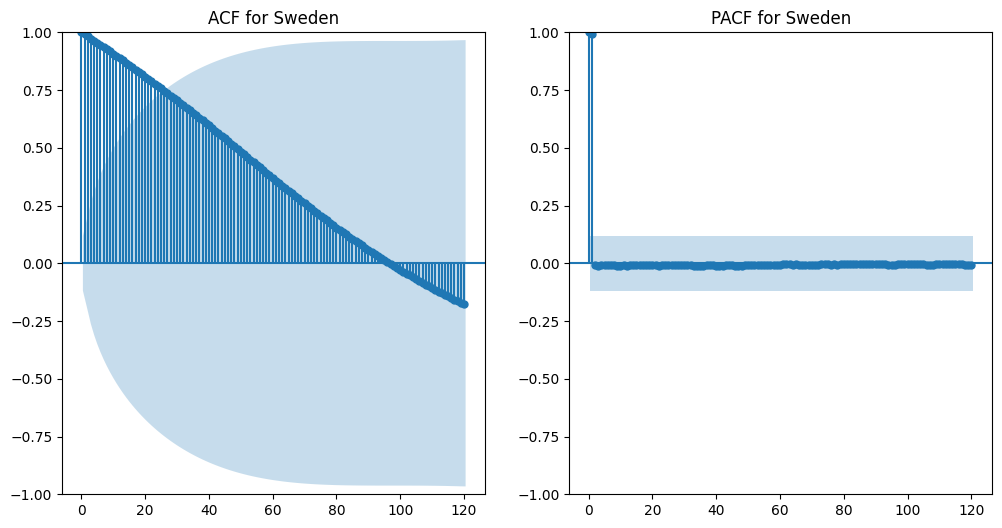

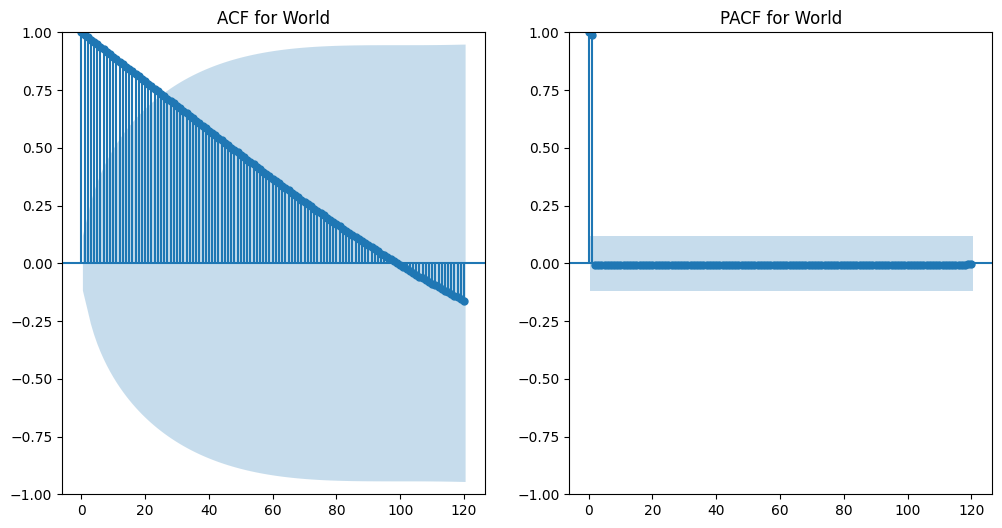


Best ARIMA Orders for Each Column:
{'Japan': (2, 2, 25), 'France': (2, 0, 36), 'Usa': (2, 2, 39), 'Colombia': (2, 1, 35), 'Sweden': (2, 2, 40), 'World': (2, 3, 38)}


In [ ]:
data_d_orders = determine_differencing_order_for_all(data)
data_d_orders
best_pacf_acf_orders = analyze_arima_orders(data,data_d_orders)
print("\nBest ARIMA Orders for Each Column:")
print(best_pacf_acf_orders)

In [ ]:
best_pacf_acf_orders

{'Japan': (2, 2, 25),
 'France': (2, 0, 36),
 'Usa': (2, 2, 39),
 'Colombia': (2, 1, 35),
 'Sweden': (2, 2, 40),
 'World': (2, 3, 38)}

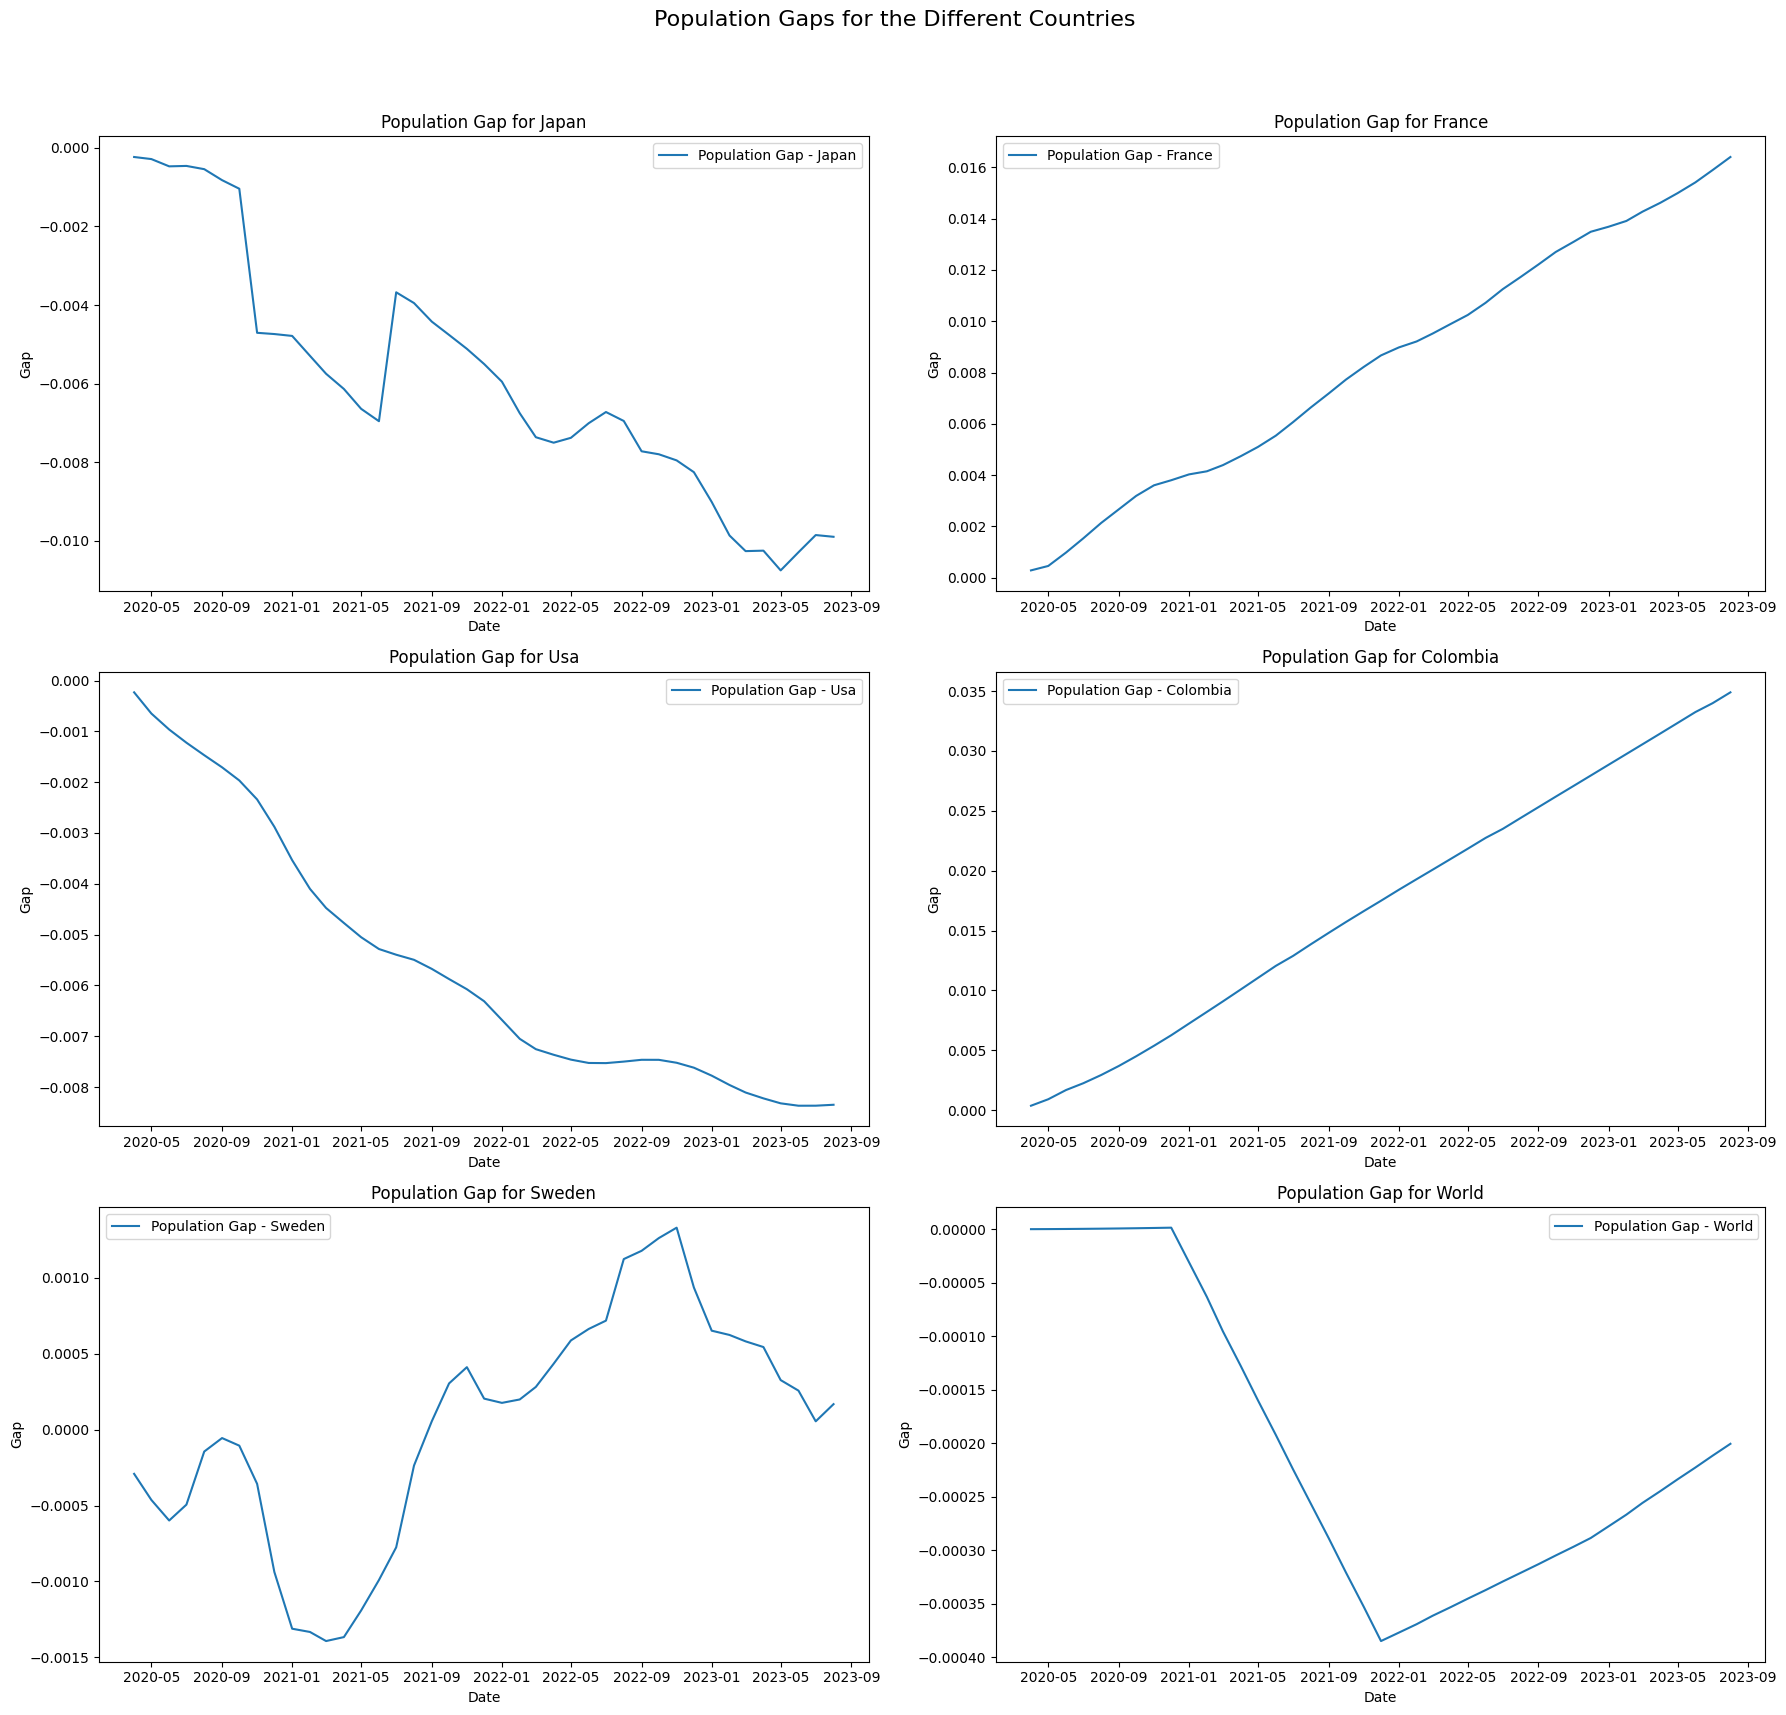

In [ ]:

arima_models, pop_gap_arima, errors_arima = ARIMA_forecast(data, best_pacf_acf_orders, cutoff='2020-03-01')

# Plot the predictions and observed test data for every country
import matplotlib.pyplot as plt
import math
import pandas as pd

# Assuming 'pop_gap_ar_1' is your DataFrame with population gaps for different countries
num_countries = len(pop_gap_ar_1.columns)
num_cols = 2
num_rows = math.ceil(num_countries / num_cols)

# Set the width of each figure to 18
fig_width = 18
fig_height = 6 * num_rows  # Adjust the height based on the number of rows

plt.figure(figsize=(fig_width, fig_height))

for idx, column in enumerate(pop_gap_ar_1.columns, 1):
    plt.subplot(num_rows, num_cols, idx)
    plt.plot(pop_gap_ar_1.index, pop_gap_ar_1[column], label=f'Population Gap - {column}')
    plt.title(f'Population Gap for {column}')
    plt.xlabel('Date')
    plt.ylabel('Gap')
    plt.legend()

plt.suptitle('Population Gaps for the Different Countries', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust the layout to make room for the main title
plt.show()


###Values above 0 represent a positive shock and values below 0 represent a negative shock

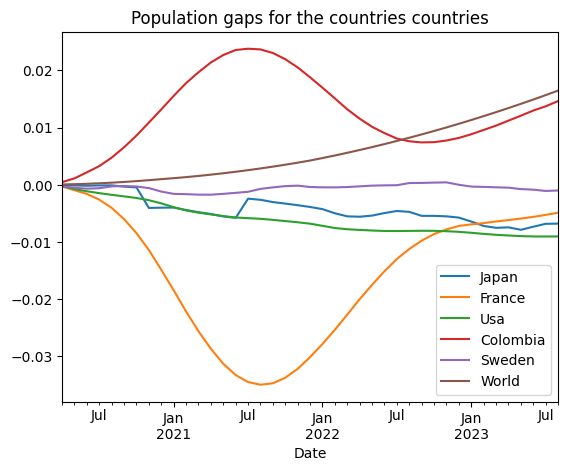

In [ ]:
pop_gap_arima.plot()
plt.title('Population gaps for the countries countries')
plt.show()

In [ ]:
errors_arima

Country           MSE      RMSE       MAE      MAPE      Bias
0     Japan  2.405598e-05  0.004905  0.004343  0.089950  0.004343
1    France  3.746904e-04  0.019357  0.015733  0.376077  0.015733
2       Usa  4.413014e-05  0.006643  0.006085  0.104740  0.006085
3  Colombia  2.031006e-04  0.014251  0.012667  0.323454 -0.012667
4    Sweden  6.650375e-07  0.000815  0.000649  0.027662  0.000581
5     World  5.756466e-05  0.007587  0.005721  0.063629 -0.005721

#Using A SARIMA Model to integrate the seasonality component
We use multithreading to make parameter finding converge faster.

In [ ]:
import pandas as pd
import numpy as np
import math
import statsmodels.api as sm
import itertools
from concurrent.futures import ThreadPoolExecutor, as_completed
from tqdm import tqdm

def evaluate_model(column, data, p, d, q, seasonal_params):
    try:
        log_transformed_column = data[column].apply(lambda x: math.log(x) if x > 0 else 0)
        model = sm.tsa.SARIMAX(log_transformed_column,
                               order=(p, d, q),
                               seasonal_order=seasonal_params)
        result = model.fit(disp=False)
        aic = result.aic

        if not math.isinf(result.zvalues.mean()):
            return aic, seasonal_params
    except Exception as e:
        return float("inf"), None

def find_best_seasonal_params(data, orders):
    P_values = range(0, 2)
    D_values = range(0, 3)
    Q_values = range(0, 2)
    m_values = [12]

    seasonal_param_combinations = list(itertools.product(P_values, D_values, Q_values, m_values))

    best_params_dict = {}

    for column in data.columns:
        p, d, q = orders[column]
        best_aic = float("inf")
        best_params = None

        futures = []
        with ThreadPoolExecutor() as executor:
            for seasonal_params in seasonal_param_combinations:
                futures.append(executor.submit(evaluate_model, column, data, p, d, q, seasonal_params))

            for future in tqdm(as_completed(futures), total=len(futures), desc=f"Column: {column}"):
                aic, params = future.result()
                if aic < best_aic:
                    best_aic = aic
                    best_params = params

        best_params_dict[column] = best_params

    for column, params in best_params_dict.items():
        print(f"Column: {column}, Best Seasonal Parameters: {params}")

    return best_params_dict

# Example usage:
# Assuming you have a DataFrame 'data' and a dictionary 'orders'
best_seasonal_params = find_best_seasonal_params(data, best_pacf_acf_orders)
print("\nBest Seasonal Parameters for Each Column:")
print(best_seasonal_params)


In [ ]:
seasonal_params={'Japan': (1, 0, 0, 12), 'France': (0, 1, 0, 12), 'Usa': (1, 0, 0, 12), 'Colombia': (1, 0, 0, 12), 'Sweden': (1, 0, 0, 12), 'World': (1, 0, 0, 12)}

def combine_sarima_params(pacf_acf_orders, seasonal_params):
    combined_params = {}
    for country in pacf_acf_orders.keys():
        # Ensure the country is present in both dictionaries
        if country in seasonal_params:
            combined_params[country] = pacf_acf_orders[country] + seasonal_params[country]
        else:
            print(f"Missing seasonal parameters for {country}")
    return combined_params

combined_sarima_params=combine_sarima_params(best_pacf_acf_orders,seasonal_params)

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

def sarima_forecast(data, best_params_dict, cutoff=None):
    if cutoff is None:
        cutoff_date = pd.to_datetime('2020-03-01')
    else:
        cutoff_date = pd.to_datetime(cutoff)

    sarima_models = {}
    training = pd.DataFrame()
    testing = pd.DataFrame()
    predictions = pd.DataFrame()
    population_gap = pd.DataFrame()
    errors = pd.DataFrame(columns=['Country', 'MSE', 'RMSE', 'MAE', 'MAPE', 'Bias'])

    for column, params in best_params_dict.items():
        series = data[column]

        order, seasonal_order = params[:3], params[3:]

        # Split the data into training and testing based on the cutoff date
        training_data = series[series.index <= cutoff_date]
        testing_data = series[series.index > cutoff_date]

        training[column] = training_data
        testing[column] = testing_data

        # Fit a SARIMA model
        model = SARIMAX(training_data, order=order, seasonal_order=seasonal_order)
        sarima_model = model.fit(disp=False)
        sarima_models[column] = sarima_model

        # Generate predictions
        forecast_steps = len(testing_data)
        forecasted_values = sarima_model.get_forecast(steps=forecast_steps).predicted_mean
        predictions[column] = forecasted_values

        # Calculate population gap
        pop_gap = testing_data - forecasted_values
        population_gap[column] = pop_gap

        # Calculate error metrics
        mse = mean_squared_error(testing_data, forecasted_values)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(testing_data, forecasted_values)
        mape = np.mean(np.abs((testing_data - forecasted_values) / testing_data)) * 100
        bias = np.mean(forecasted_values - testing_data)

        # Append error metrics to DataFrame
        errors = errors.append({
            'Country': column,
            'MSE': mse,
            'RMSE': rmse,
            'MAE': mae,
            'MAPE': mape,
            'Bias': bias
        }, ignore_index=True)

    return sarima_models, training, testing, predictions, population_gap, errors

# Example usage

sarima_models, training, testing, predictions, population_gap_sarima, errors_sarima = sarima_forecast(data, combined_sarima_params)


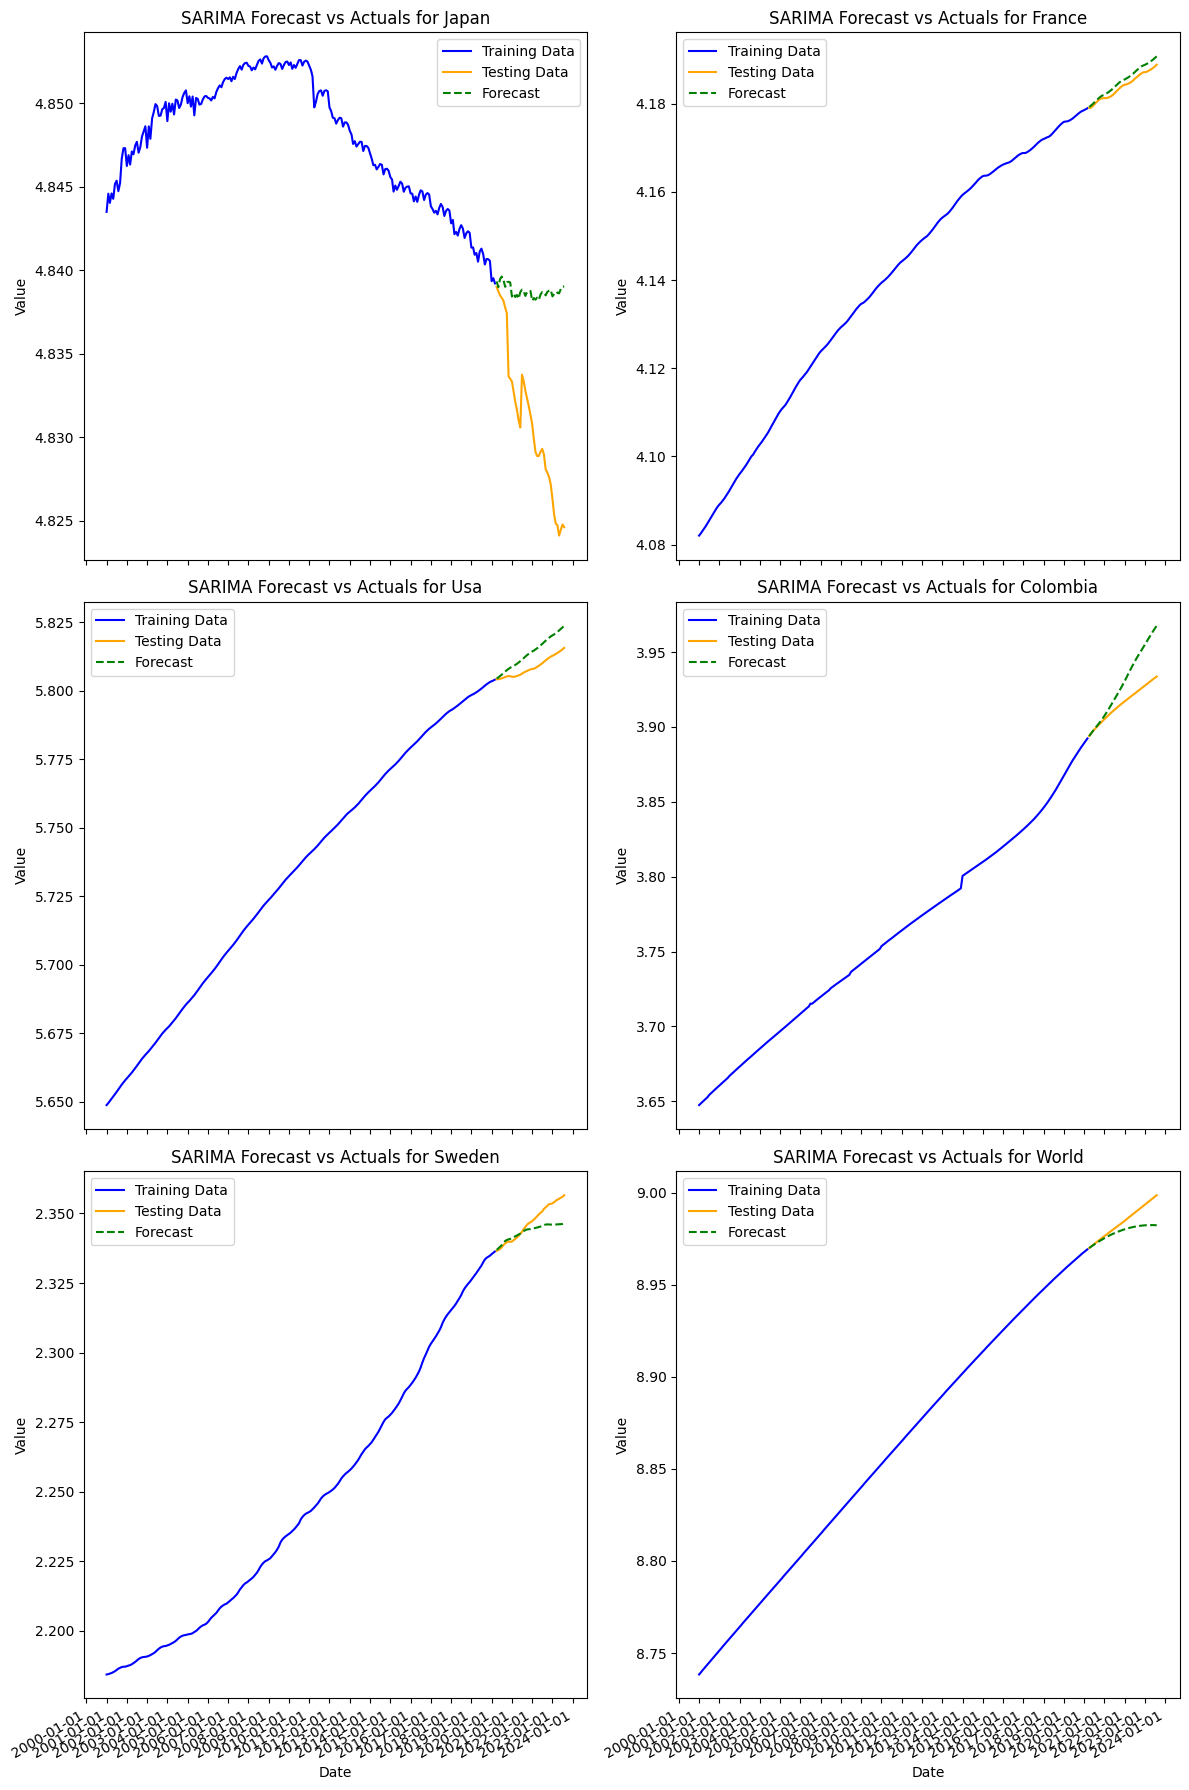

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import math
import pandas as pd

def plot_sarima_forecast(data, sarima_models, training, testing, cutoff=None):
    if cutoff is None:
        cutoff_date = pd.to_datetime('2020-03-01')
    else:
        cutoff_date = pd.to_datetime(cutoff)

    num_countries = len(sarima_models.keys())
    num_cols = 2
    num_rows = math.ceil(num_countries / num_cols)

    plt.figure(figsize=(12, 6 * num_rows))

    for idx, (column, sarima_model) in enumerate(sarima_models.items(), 1):
        # Forecast future values
        forecast_steps = len(data[column]) - len(data[column][data.index <= cutoff_date])
        predictions = sarima_model.get_forecast(steps=forecast_steps)
        predicted_values = predictions.predicted_mean

        # Create subplot
        plt.subplot(num_rows, num_cols, idx)

        # Plot training data
        plt.plot(training.index, training[column], label='Training Data', color='blue')

        # Plot testing data
        plt.plot(testing.index, testing[column], label='Testing Data', color='orange')

        # Plot forecasted data
        plt.plot(predicted_values.index, predicted_values, label='Forecast', linestyle='--', color='green')

        # Formatting plot
        plt.title(f'SARIMA Forecast vs Actuals for {column}')
        plt.xlabel('Date')
        plt.ylabel('Value')
        plt.legend()
        plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
        plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=12))
        plt.gcf().autofmt_xdate()  # Rotate date labels

    plt.tight_layout()
    plt.show()

# Example usage:
# Assuming sarima_models, training, testing data are available from the sarima_forecast function
# plot_sarima_forecast(data, sarima_models, training, testing)

# Example usage:
# Assuming sarima_models, training, testing data are available from the sarima_forecast function
plot_sarima_forecast(data, sarima_models, training, testing)


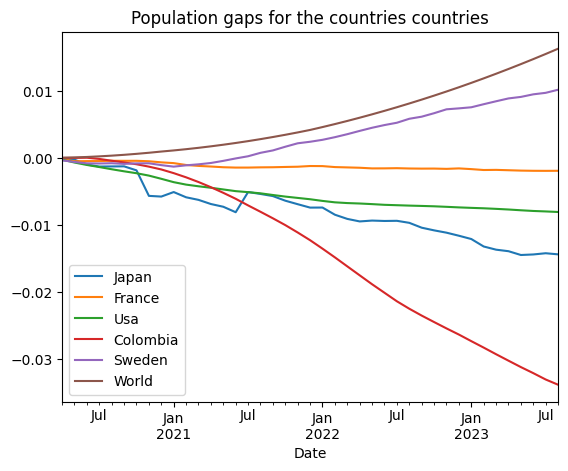

In [ ]:
population_gap_sarima.plot()
plt.title('Population gaps for the countries countries')
plt.show()

In [ ]:
errors_sarima

Country       MSE      RMSE       MAE      MAPE      Bias
0     Japan  0.000079  0.008895  0.007847  0.162508  0.007847
1    France  0.000002  0.001353  0.001259  0.030073  0.001259
2       Usa  0.000034  0.005847  0.005375  0.092515  0.005375
3  Colombia  0.000329  0.018132  0.014098  0.359231  0.014094
4    Sweden  0.000025  0.004982  0.003736  0.158866 -0.003181
5     World  0.000057  0.007527  0.005676  0.063131 -0.005676

#  Hybrid ARIMA

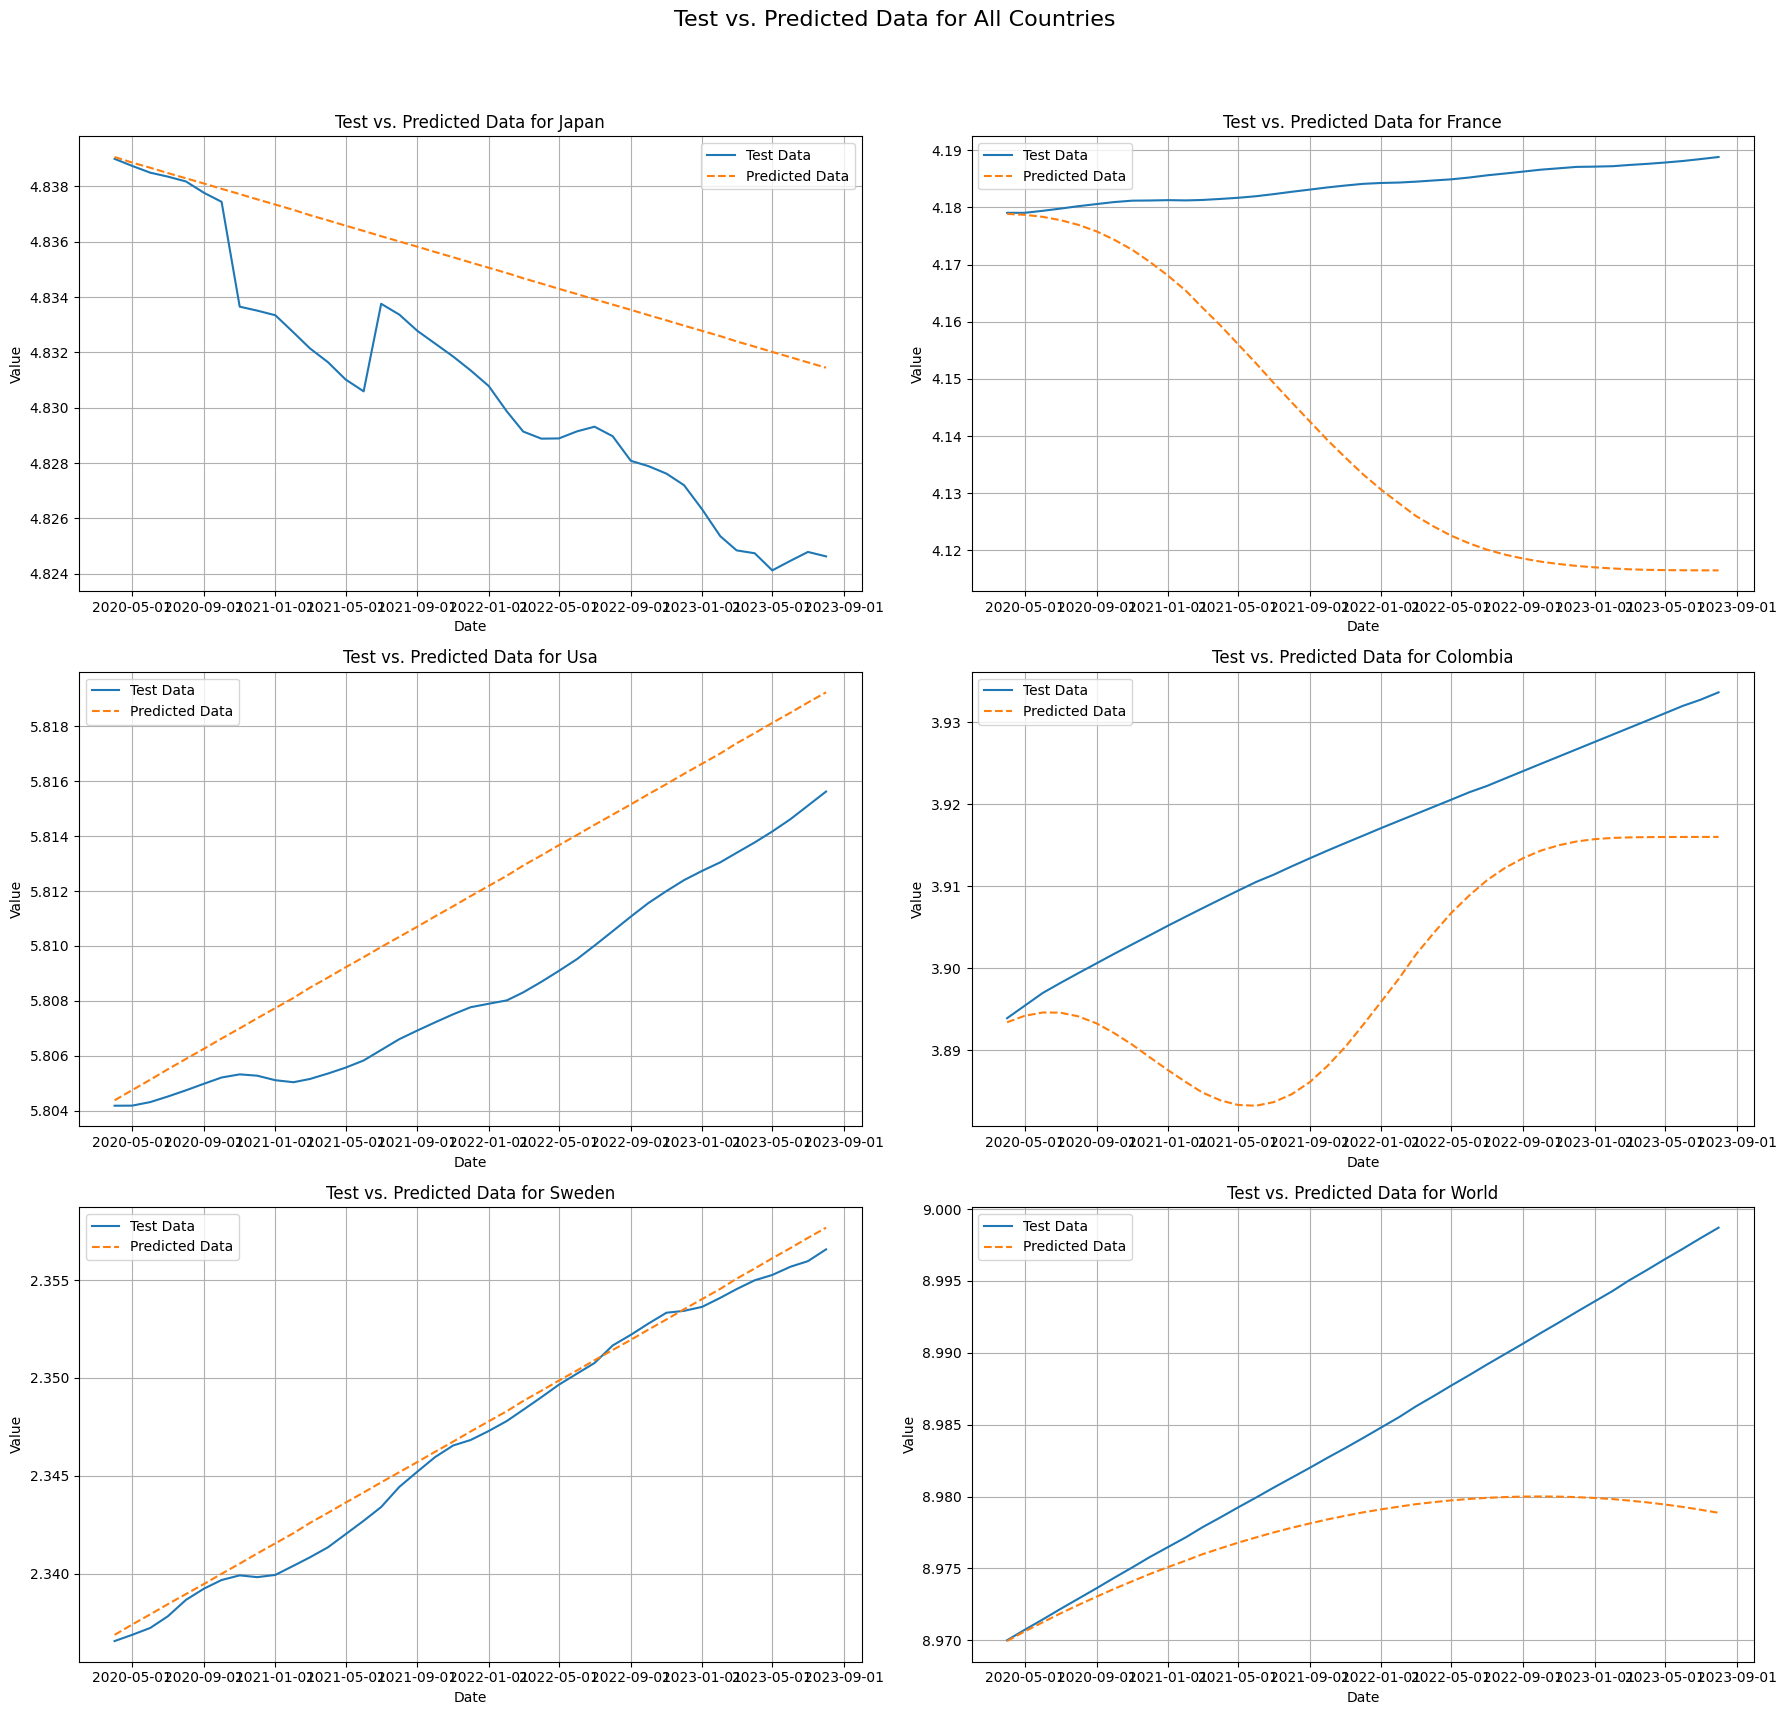

Test Errors:
               Japan    France       Usa  Colombia    Sweden     World
Date                                                                  
2020-04-01 -0.000068  0.000189 -0.000197  0.000497 -0.000318  0.000057
2020-05-01 -0.000120  0.000348 -0.000565  0.001228 -0.000526  0.000115
2020-06-01 -0.000178  0.001058 -0.000814  0.002385 -0.000694  0.000196
2020-07-01 -0.000130  0.002010 -0.000992  0.003614 -0.000619  0.000309
2020-08-01 -0.000114  0.003273 -0.001142  0.005283 -0.000298  0.000437
2020-09-01 -0.000336  0.004773 -0.001274  0.007325 -0.000239  0.000588
2020-10-01 -0.000470  0.006573 -0.001419  0.009660 -0.000319  0.000765
2020-11-01 -0.004069  0.008595 -0.001675  0.012234 -0.000600  0.000962
2020-12-01 -0.004022  0.010727 -0.002093  0.014886 -0.001211  0.001181
2021-01-01 -0.003999  0.013194 -0.002628  0.017611 -0.001615  0.001391
2021-02-01 -0.004429  0.015831 -0.003071  0.020213 -0.001667  0.001623
2021-03-01 -0.004813  0.018836 -0.003324  0.022479 -0.001757  0.

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import math
import matplotlib.dates as mdates

def hybrid_arima(data):
    test_errors = pd.DataFrame()
    training_errors = pd.DataFrame()
    predictions_df = pd.DataFrame()
    test_set = pd.DataFrame()

    log_transformed_data = np.log1p(data)
    cutoff_date = pd.to_datetime('2020-03-01')

    num_countries = len(data.columns)
    num_cols = 2
    num_rows = math.ceil(num_countries / num_cols)

    plt.figure(figsize=(18, 6 * num_rows))

    for idx, column in enumerate(data.columns, 1):
        train = log_transformed_data[column][log_transformed_data.index <= cutoff_date]
        test = log_transformed_data[column][log_transformed_data.index > cutoff_date]

        # Fit the ARIMA model
        model = ARIMA(train, order=best_pacf_acf_orders.get(column))
        fitted_model = model.fit()

        # Forecast all test values
        predictions = fitted_model.forecast(steps=len(test))

        # Calculate and store errors
        error_list = np.expm1(test) - np.expm1(predictions)
        test_error = mean_squared_error(np.expm1(test), np.expm1(predictions))
        training_error = mean_squared_error(np.expm1(train), np.expm1(fitted_model.fittedvalues))

        test_errors[column] = error_list
        training_errors[column] = np.expm1(train) - np.expm1(fitted_model.fittedvalues)
        predictions_df[column] = np.expm1(predictions)
        test_set[column] = np.expm1(test)

        # Create subplot
        ax = plt.subplot(num_rows, num_cols, idx)
        ax.plot(test.index, np.expm1(test), label='Test Data')
        ax.plot(predictions.index, np.expm1(predictions), label='Predicted Data', linestyle='--')
        ax.set_xlabel('Date')
        ax.set_ylabel('Value')
        ax.set_title(f'Test vs. Predicted Data for {column}')
        ax.legend()
        ax.grid(True)
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
        ax.xaxis.set_major_locator(mdates.AutoDateLocator())

    plt.suptitle('Test vs. Predicted Data for All Countries', fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

    return test_errors, training_errors, predictions_df, test_set

test_errors_arima_ann, training_errors_arima_ann, predictions_df_arima_ann,test_arima_ann = hybrid_arima(data)

# Access the DataFrames with test errors, training errors, and predictions
print("Test Errors:")
print(test_errors_arima_ann)

print("\nTraining Errors:")
print(training_errors_arima_ann)

print("\nPredictions:")
print(predictions_df_arima_ann)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
import pandas as pd
#test_errors_arima_ann, training_errors_arima_ann, predictions_df_arima_ann,test_arima_ann
test_pred_arima_ann = pd.DataFrame()

# Define the model
model = Sequential()
model.add(Dense(64, activation='tanh', input_shape=(1,)))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Iterate over columns (countries) in training_errors_arima
for i in training_errors_arima_ann.columns:
    train_resid = training_errors_arima_ann[i].values.reshape(-1, 1)
    test_resid = test_errors_arima_ann[i].values.reshape(-1, 1)

    scaler = StandardScaler()
    train_resid = scaler.fit_transform(train_resid)
    test_resid = scaler.transform(test_resid)

    # Use the same model for all countries
    model.fit(train_resid, train_resid, epochs=50, batch_size=32, validation_split=0.2, verbose=0)

    # Predict test values
    test_predictions = model.predict(test_resid)

    # Inverse transform the predictions
    test_predictions = scaler.inverse_transform(test_predictions)

    # Store predictions in the DataFrame
    test_pred_arima_ann[i] = test_predictions.flatten()


2/2 [==============================] - 0s 7ms/step


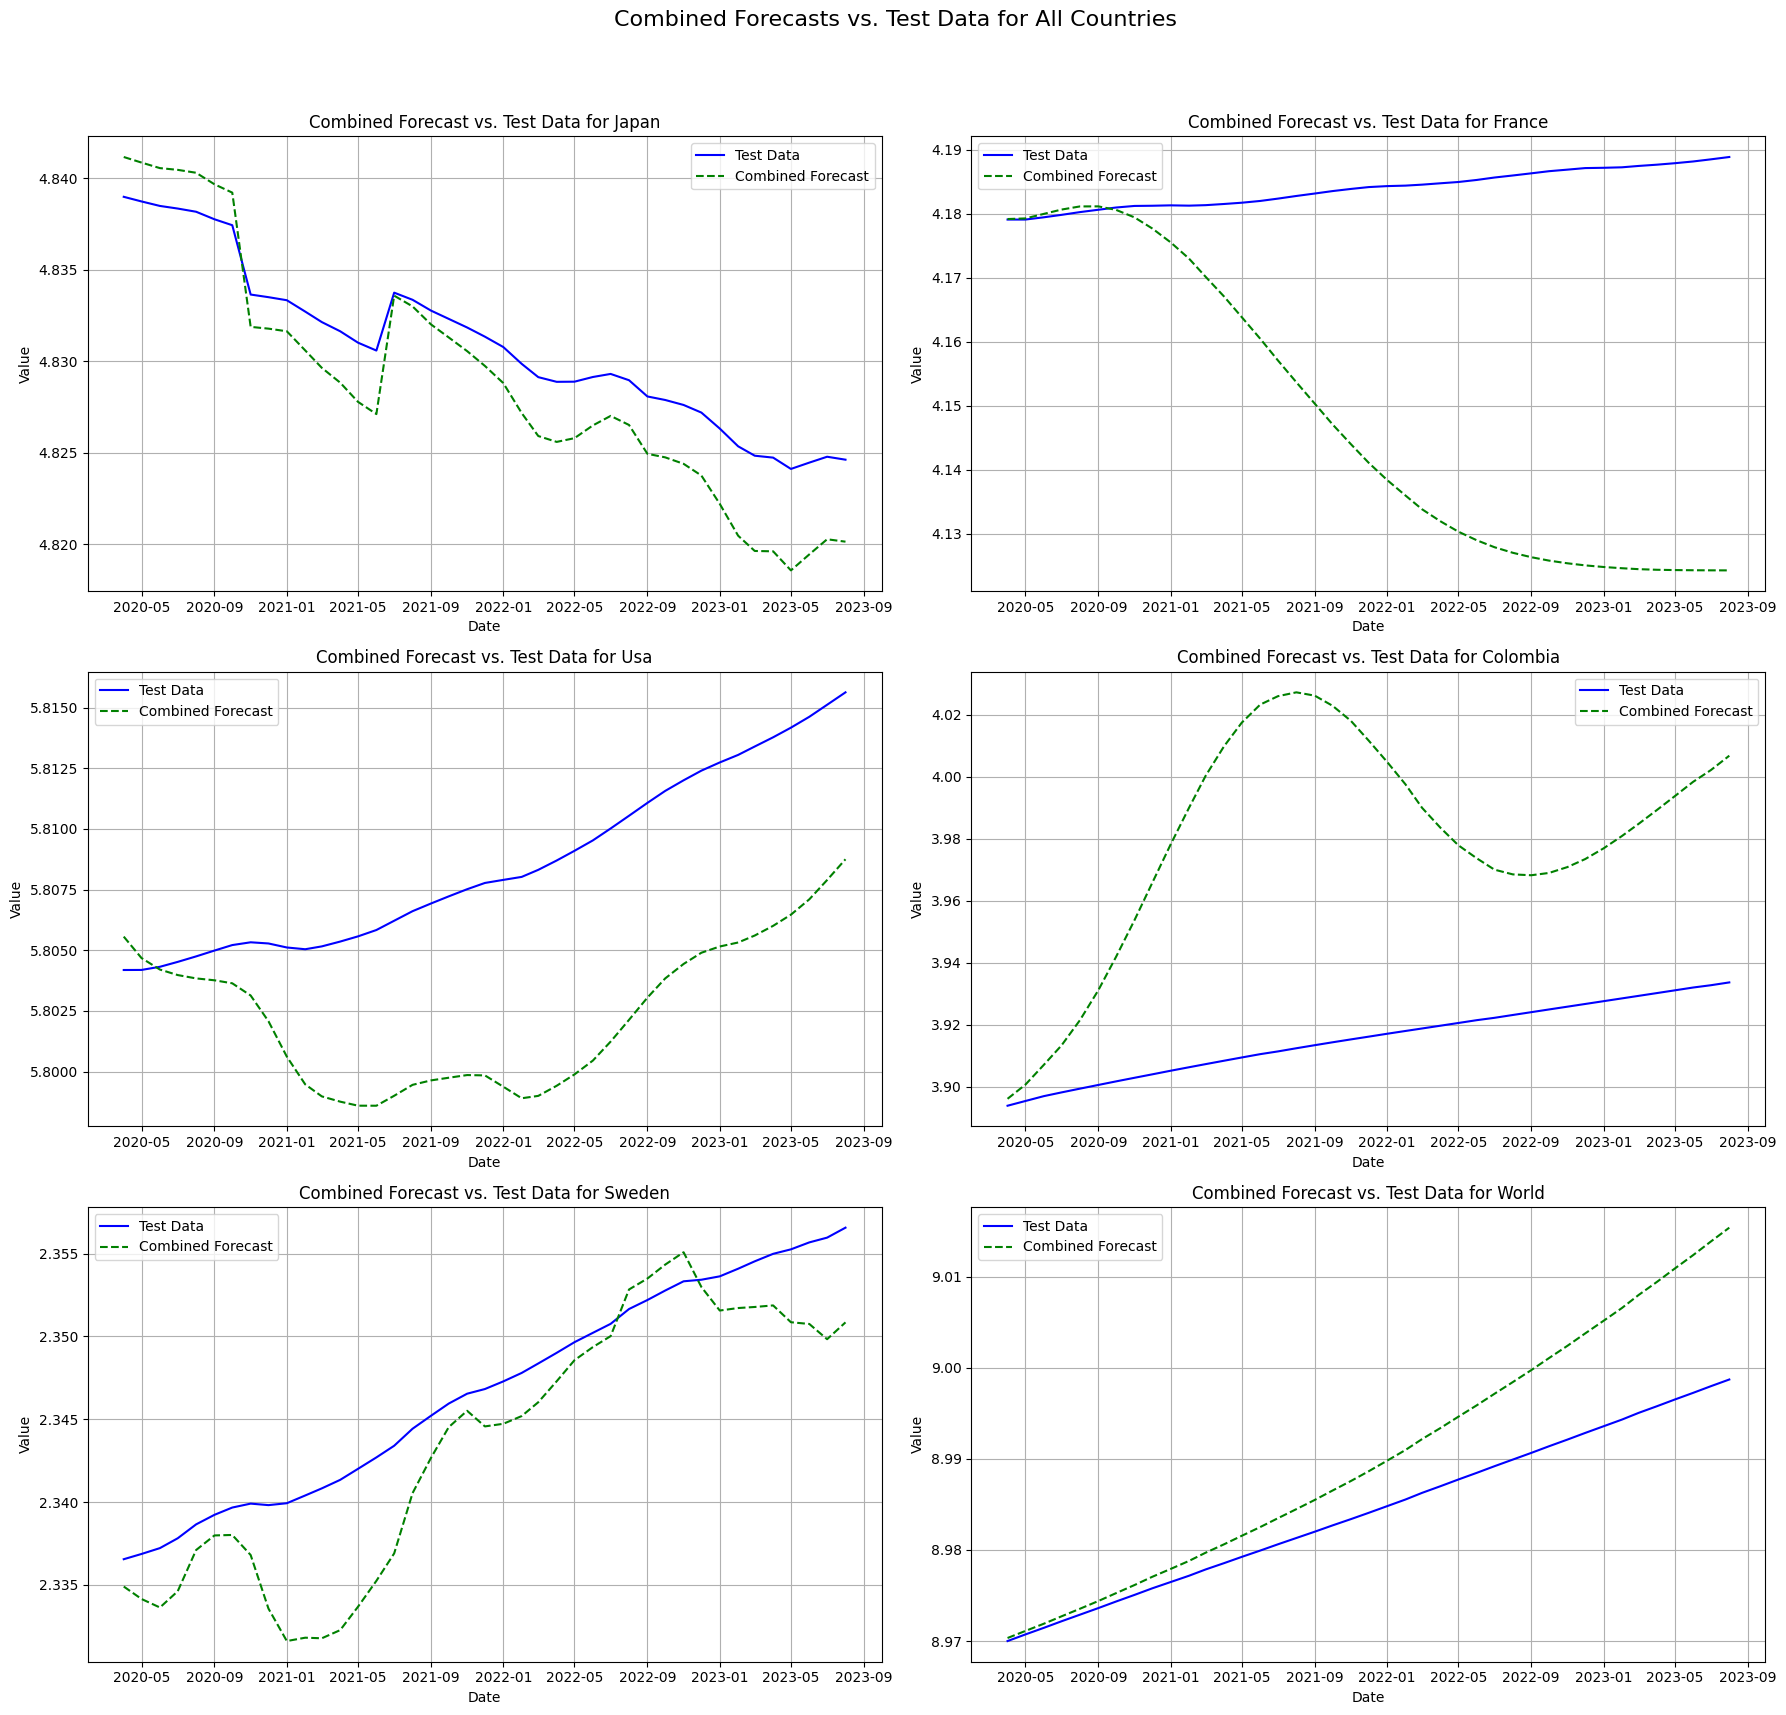

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import math

# Assuming 'test_arima_ann' is your observed test data and 'predictions_df_arima_ann', 'test_pred_arima_ann' are your predictions
combined_forecasts_hybrid_ann = pd.DataFrame(index=test_arima_ann.index)
pop_gap_hybrid_ann = pd.DataFrame(index=test_arima_ann.index)

num_countries = len(test_pred_arima_ann.columns)
num_cols = 2
num_rows = math.ceil(num_countries / num_cols)

plt.figure(figsize=(18, 6 * num_rows))

for idx, column in enumerate(test_pred_arima_ann.columns, 1):
    final_forecasts = predictions_df_arima_ann[column].values + test_pred_arima_ann[column].values

    # Create subplot
    plt.subplot(num_rows, num_cols, idx)
    plt.plot(test_arima_ann.index, test_arima_ann[column], label='Test Data', color='blue', )
    plt.plot(test_arima_ann.index, final_forecasts, label='Combined Forecast', linestyle='--', color='green',  )
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.title(f'Combined Forecast vs. Test Data for {column}')
    plt.legend()
    plt.grid(True)

    # Store the combined forecasts in the DataFrame
    combined_forecasts_hybrid_ann[column] = final_forecasts

    # Calculate and store population gaps
    pop_gap_hybrid_ann[column] = test_arima_ann[column] - final_forecasts

plt.suptitle('Combined Forecasts vs. Test Data for All Countries', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust the layout to make room for the main title
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import math
import matplotlib.dates as mdates

# Assuming 'test_s' is your observed test data
# Resample the observed test data to annual frequency
test_s_annual = test_arima_ann.resample('A').sum()
combined_forecasts_annual = combined_forecasts_hybrid_ann.resample('A').sum()

num_countries = len(combined_forecasts_annual.columns)
num_cols = 2
num_rows = math.ceil(num_countries / num_cols)

plt.figure(figsize=(18, 6 * num_rows))

for idx, column in enumerate(combined_forecasts_annual.columns, 1):
    plt.subplot(num_rows, num_cols, idx)
    plt.plot(test_s_annual.index, test_s_annual[column], label=f'Observed - {column}', color='blue', marker='o')
    plt.plot(combined_forecasts_annual.index, combined_forecasts_annual[column], label=f'Forecast - {column}', linestyle='--', color='green', marker='o')

    plt.xlabel('Year')
    plt.ylabel('Value')
    plt.title(f'Observed vs. Forecast (Annual Resampled) for {column}')
    plt.legend()
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    plt.gca().xaxis.set_major_locator(mdates.YearLocator())
    plt.grid(True)

plt.suptitle('Observed vs. Forecast (Annual Resampled) for All Countries', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust the layout to make room for the main title
plt.show()


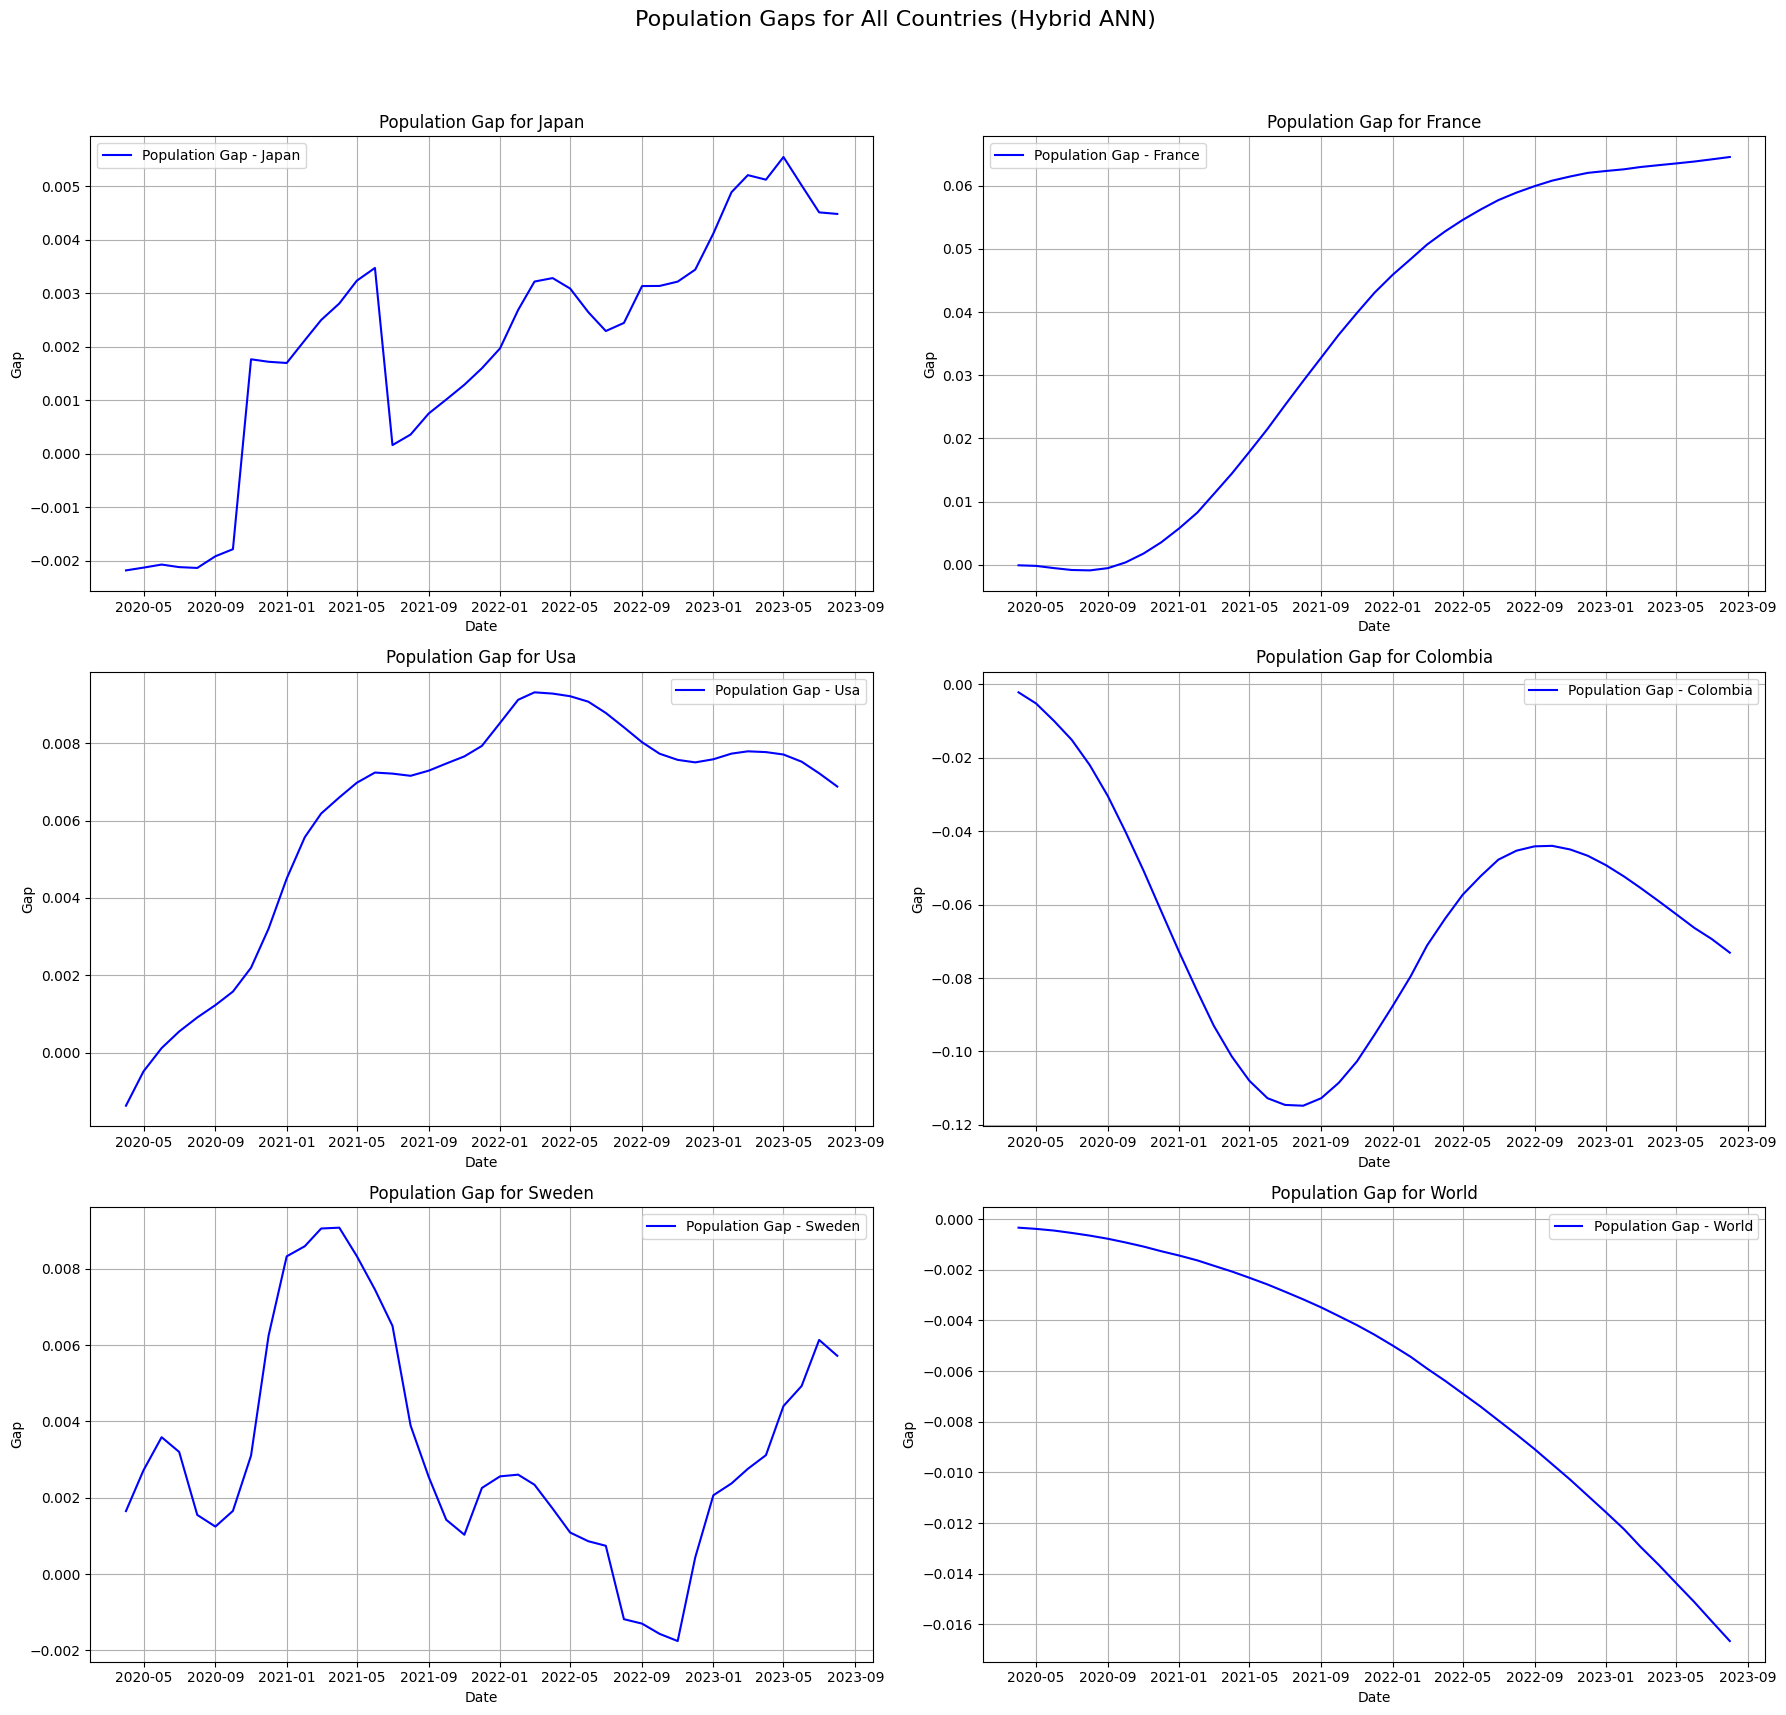

In [ ]:
import matplotlib.pyplot as plt
import math
import pandas as pd

# Assuming 'pop_gap_hybrid_ann' is your DataFrame with population gaps for different countries
num_countries = len(pop_gap_hybrid_ann.columns)
num_cols = 2
num_rows = math.ceil(num_countries / num_cols)

plt.figure(figsize=(18, 6 * num_rows))

for idx, column in enumerate(pop_gap_hybrid_ann.columns, 1):
    ax = plt.subplot(num_rows, num_cols, idx)
    ax.plot(pop_gap_hybrid_ann.index, pop_gap_hybrid_ann[column], label=f'Population Gap - {column}', color='blue', )
    ax.set_title(f'Population Gap for {column}')
    ax.set_xlabel('Date')
    ax.set_ylabel('Gap')
    ax.legend()
    ax.grid(True)

plt.suptitle('Population Gaps for All Countries (Hybrid ANN)', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust the layout to make room for the main title
plt.show()


In [ ]:
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

def calculate_forecast_accuracy_metrics(actual, forecast):
    mse = mean_squared_error(actual, forecast)
    mae = mean_absolute_error(actual, forecast)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((actual - forecast) / actual)) * 100
    bias = np.mean(forecast - actual)
    return mse, mae, rmse, mape, bias

# Assuming 'test_arima_ann' is the actual data and 'combined_forecasts_hybrid_ann' contains the forecasts
accuracy_metrics_df_hybrid_ann = pd.DataFrame(columns=['Country', 'MSE', 'MAE', 'RMSE', 'MAPE', 'Bias'])

for column in combined_forecasts_hybrid_ann.columns:
    mse, mae, rmse, mape, bias = calculate_forecast_accuracy_metrics(test_arima_ann[column], combined_forecasts_hybrid_ann[column])
    accuracy_metrics_df_hybrid_ann = accuracy_metrics_df_hybrid_ann.append({
        'Country': column,
        'MSE': mse,
        'MAE': mae,
        'RMSE': rmse,
        'MAPE': mape,
        'Bias': bias
    }, ignore_index=True)

# Display the accuracy metrics DataFrame
print(accuracy_metrics_df_hybrid_ann)


    Country       MSE       MAE      RMSE      MAPE      Bias
0     Japan  0.000009  0.002738  0.003035  0.056691 -0.002040
1    France  0.001912  0.035877  0.043726  0.857100 -0.035729
2       Usa  0.000047  0.006248  0.006853  0.107544 -0.006157
3  Colombia  0.005064  0.064160  0.071160  1.638205  0.064160
4    Sweden  0.000019  0.003490  0.004326  0.148795 -0.003207
5     World  0.000061  0.006005  0.007784  0.066784  0.006005


#SARIMA-LSTM MODEL


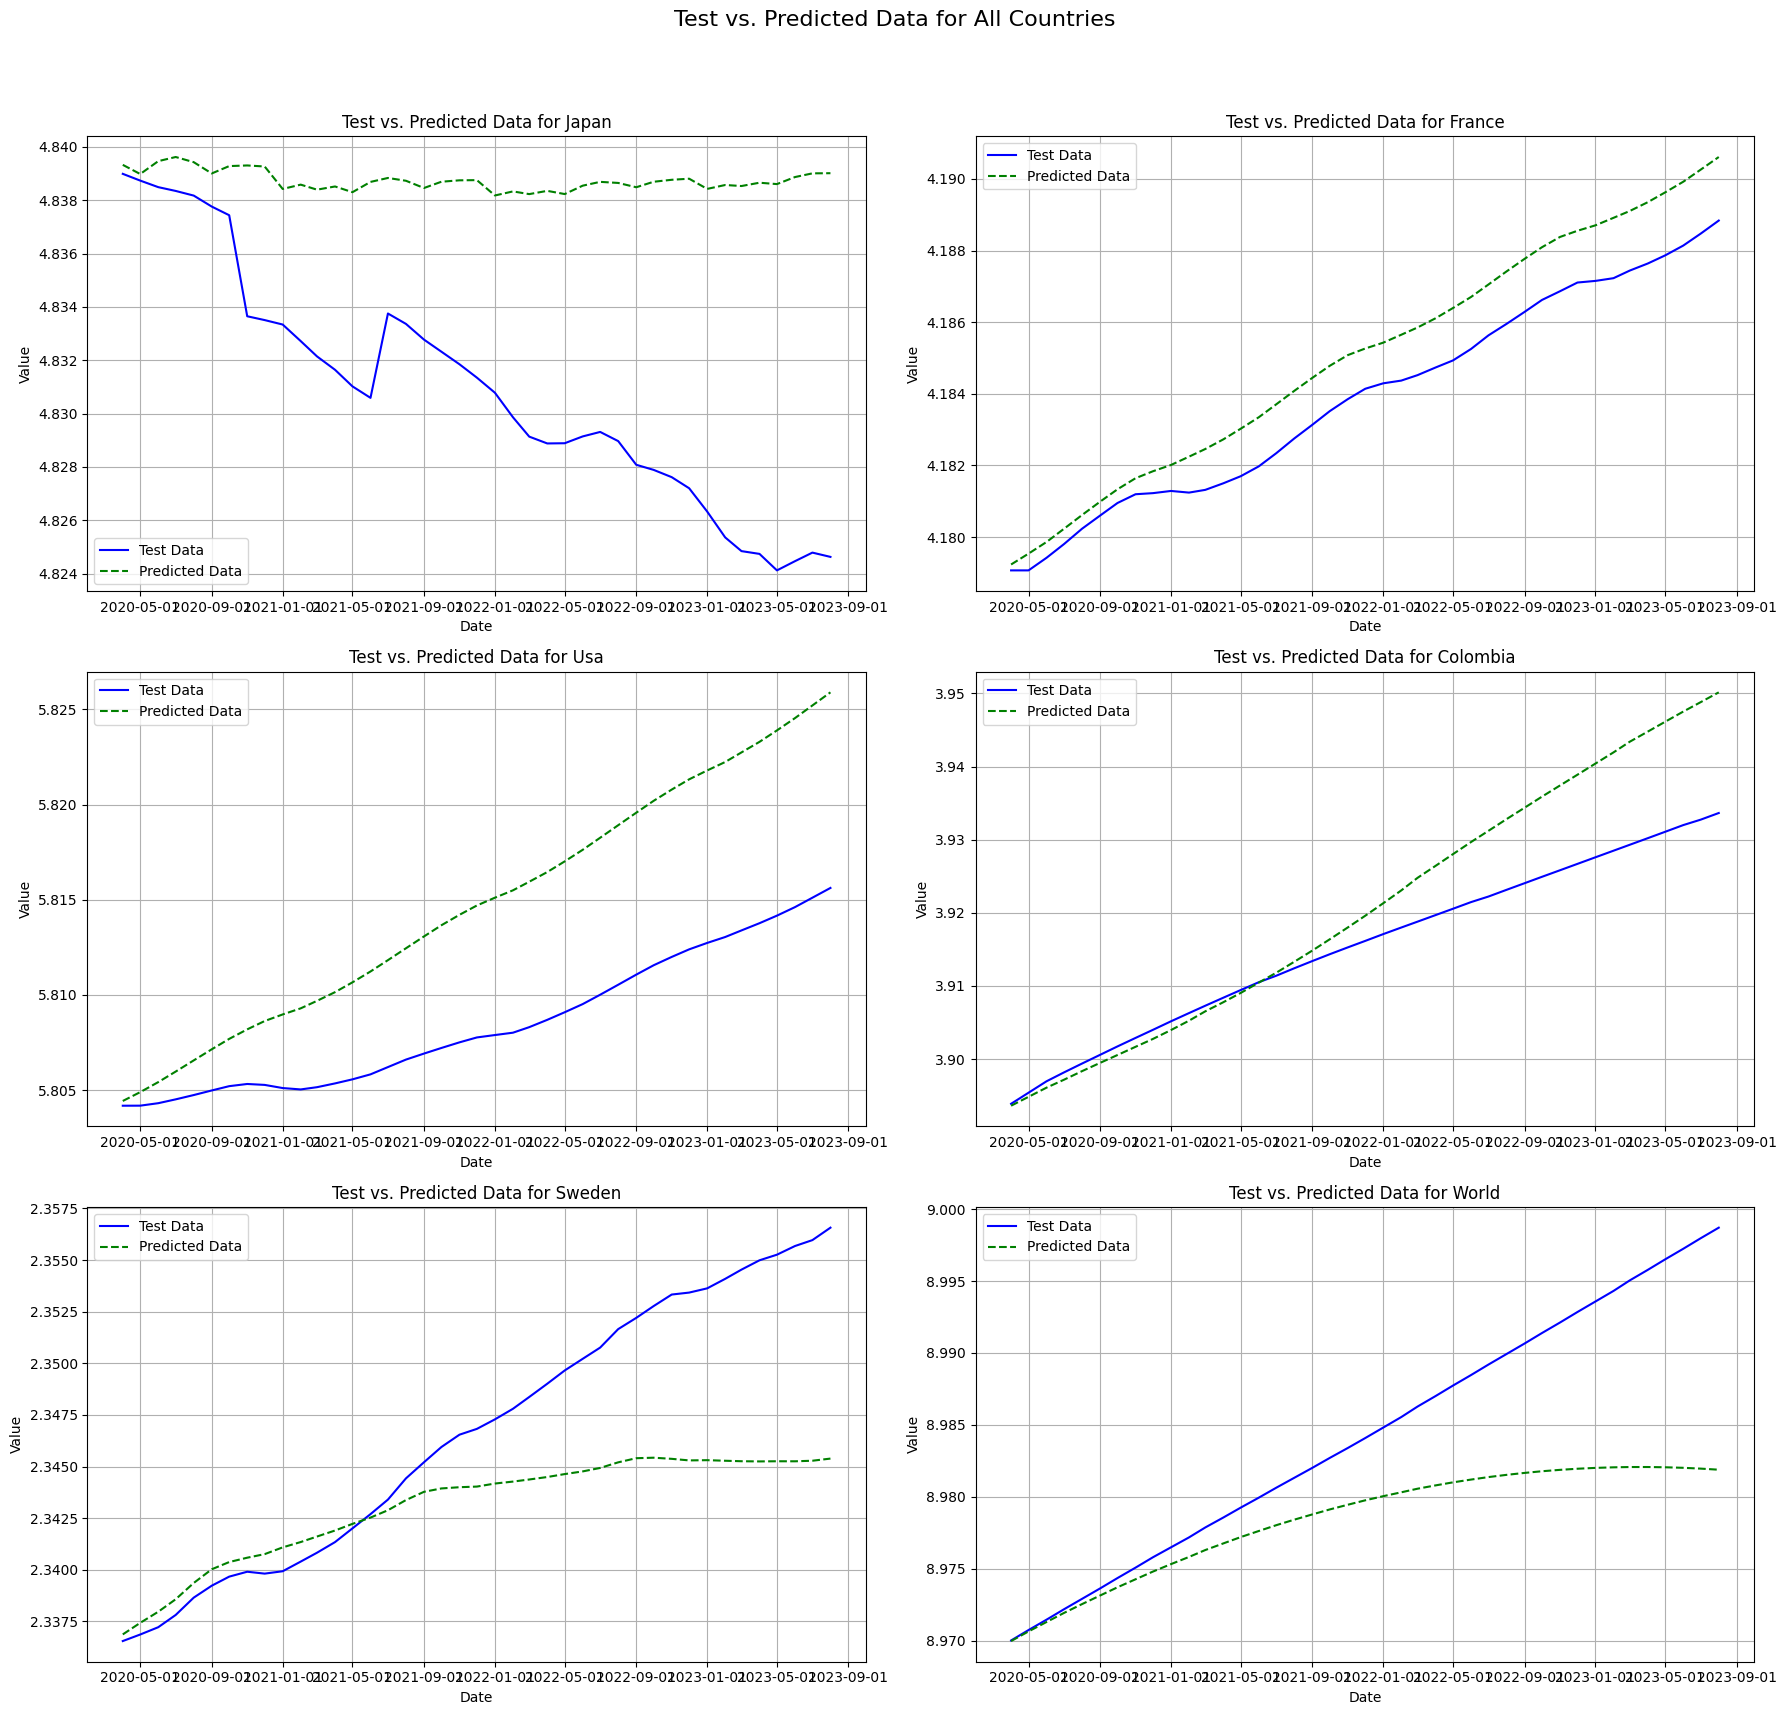

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

def hybrid_sarima(data, best_params_dict):
    test_errors = pd.DataFrame()
    training_errors = pd.DataFrame()
    predictions_df = pd.DataFrame()
    test_set = pd.DataFrame()

    log_transformed_data = np.log1p(data)
    cutoff_date = pd.to_datetime('2020-03-01')

    num_countries = len(data.columns)
    num_cols = 2
    num_rows = math.ceil(num_countries / num_cols)

    plt.figure(figsize=(18, 6 * num_rows))

    for idx, column in enumerate(data.columns, 1):
        train = log_transformed_data[column][log_transformed_data.index <= cutoff_date]
        test = log_transformed_data[column][log_transformed_data.index > cutoff_date]

        # Get the best order and seasonal order
        best_order = best_params_dict[column][:3]
        best_seasonal_order = best_params_dict[column][3:]

        # Fit the SARIMA model
        model = SARIMAX(train, order=best_order, seasonal_order=best_seasonal_order)
        fitted_model = model.fit()

        # Forecast all test values
        predictions = fitted_model.forecast(steps=len(test))
        predictions.index = test.index

        # Calculate errors
        test_error = mean_squared_error(np.expm1(test), np.expm1(predictions))
        training_error = mean_squared_error(np.expm1(train), np.expm1(fitted_model.fittedvalues))

        test_errors[column] = np.expm1(test) - np.expm1(predictions)
        training_errors[column] = np.expm1(train) - np.expm1(fitted_model.fittedvalues)
        predictions_df[column] = np.expm1(predictions)
        test_set[column] = np.expm1(test)

        # Create subplot
        ax = plt.subplot(num_rows, num_cols, idx)
        ax.plot(test.index, np.expm1(test), label='Test Data', color='blue')
        ax.plot(predictions.index, np.expm1(predictions), label='Predicted Data', linestyle='--', color='green')
        ax.set_xlabel('Date')
        ax.set_ylabel('Value')
        ax.set_title(f'Test vs. Predicted Data for {column}')
        ax.legend()
        ax.grid(True)
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
        ax.xaxis.set_major_locator(mdates.AutoDateLocator())

    plt.suptitle('Test vs. Predicted Data for All Countries', fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

    return test_errors, training_errors, predictions_df, test_set


test_errors_sarima_lstm, training_errors_sarima_lstm, predictions_df_sarima_lstm, test_set_sarima_lstm = hybrid_sarima(data, combined_sarima_params)


In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import StandardScaler
import pandas as pd
#test_errors_sarima_lstm, training_errors_sarima_lstm, predictions_df_sarima_lstm, test_set_sarima_lstm
# Assuming you have training_errors and test_errors DataFrames as before
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Initialize an empty DataFrame to store predictions
predictions_df__lstm = pd.DataFrame()

# Iterate over columns (countries) in training_errors_sarima_lstm
for i in training_errors_sarima_lstm.columns:
    train_resid = training_errors_sarima_lstm[i].values.reshape(-1, 1)
    test_resid = test_errors_sarima_lstm[i].values.reshape(-1, 1)

    scaler = StandardScaler()
    train_resid = scaler.fit_transform(train_resid)
    test_resid = scaler.transform(test_resid)

    # Reshape input to be [samples, time steps, features] which is required for LSTM
    train_resid = train_resid.reshape((train_resid.shape[0], 1, train_resid.shape[1]))
    test_resid = test_resid.reshape((test_resid.shape[0], 1, test_resid.shape[1]))

    # Define the LSTM model
    model = Sequential()
    model.add(LSTM(64, activation='tanh', input_shape=(1, 1)))
    model.add(Dense(32, activation='sigmoid'))
    model.add(Dense(1))

    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Fit the model
    model.fit(train_resid, train_resid, epochs=50, batch_size=32, validation_split=0.2, verbose=0)

    # Predict test values
    test_predictions = model.predict(test_resid)

    # Inverse transform the predictions
    test_predictions = scaler.inverse_transform(test_predictions)

    # Store predictions in the DataFrame
    predictions_df__lstm[i] = test_predictions.flatten()

# Output DataFrame with predictions
print(predictions_df__lstm)


2/2 [==============================] - 1s 10ms/step


2/2 [==============================] - 0s 9ms/step


2/2 [==============================] - 0s 8ms/step
       Japan    France       Usa  Colombia    Sweden     World
0  -0.000485  0.000901  0.005459  0.002710 -0.000174 -0.006005
1  -0.000399  0.000607  0.004961  0.002879 -0.000427 -0.005974
2  -0.001091  0.000633  0.004534  0.003051 -0.000618 -0.005934
3  -0.001374  0.000646  0.004154  0.003125 -0.000631 -0.005880
4  -0.001355  0.000689  0.003765  0.003146 -0.000578 -0.005815
5  -0.001345  0.000685  0.003396  0.003180 -0.000667 -0.005741
6  -0.001915  0.000689  0.003050  0.003223 -0.000574 -0.005655
7  -0.005540  0.000627  0.002635  0.003245 -0.000546 -0.005557
8  -0.005639  0.000468  0.002111  0.003262 -0.000821 -0.005448
9  -0.004997  0.000357  0.001558  0.003235 -0.001043 -0.005347
10 -0.005741  0.000087  0.001135  0.003147 -0.000825 -0.005236
11 -0.006107 -0.000046  0.000837  0.002993 -0.000655 -0.005112
12 -0.006698 -0.000129  0.000559  0.002908 -0.000422 -0.004977
13 -0.007086 -0.000226  0.000233  0.002782 -0.000066 -0.004832
14 -

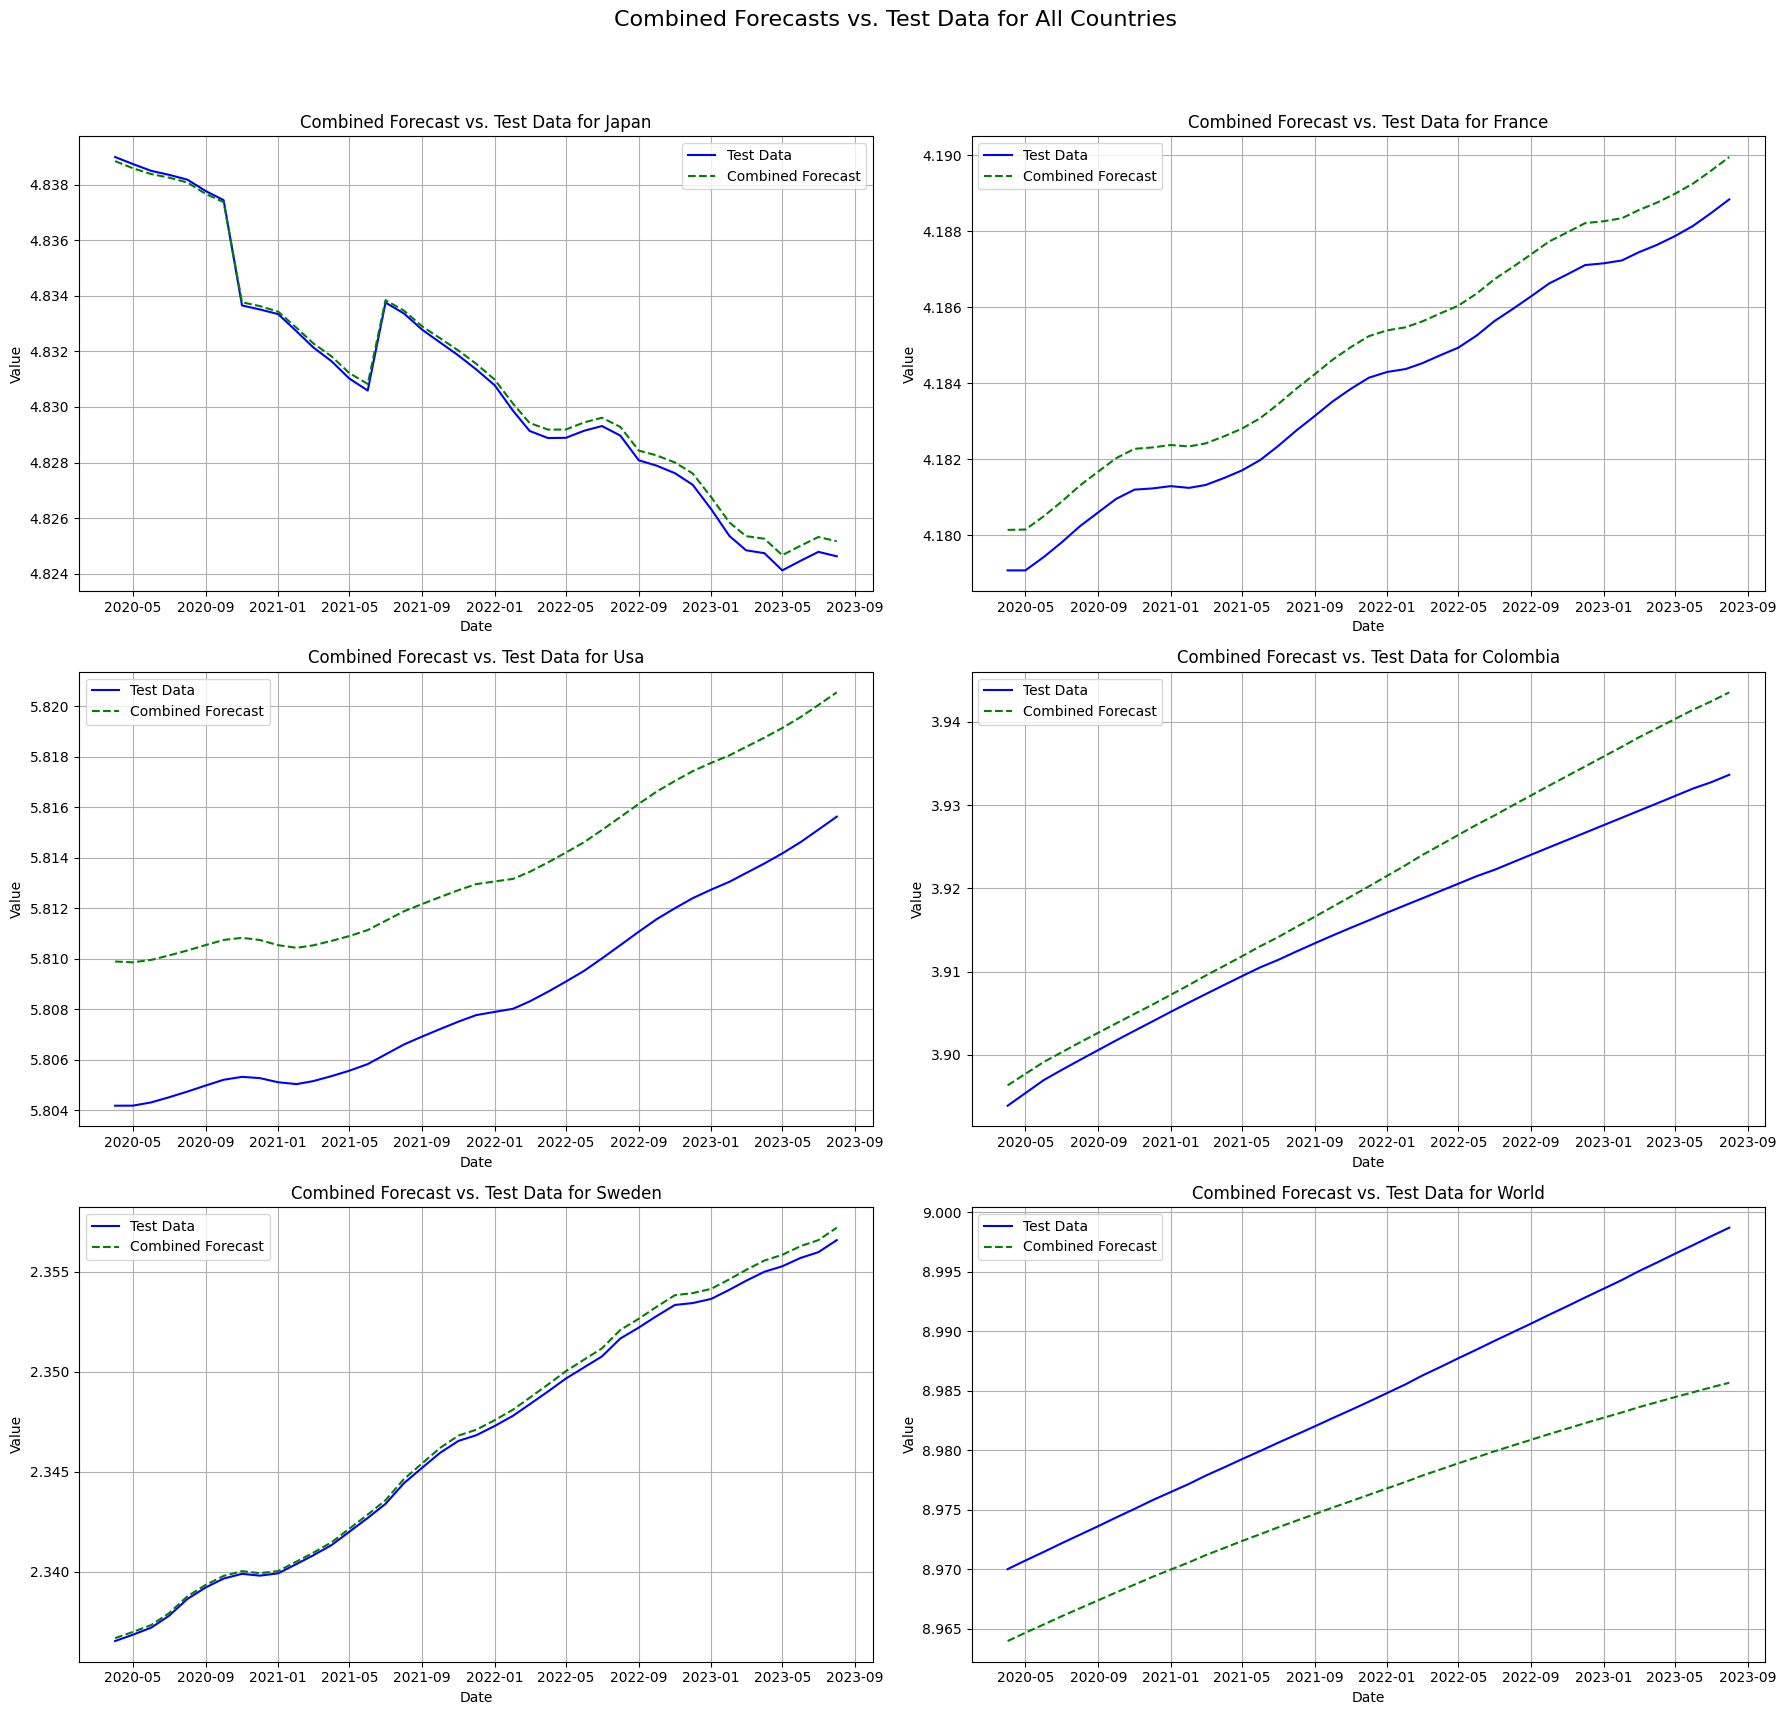

Combined Forecasts:
               Japan    France       Usa  Colombia    Sweden     World
Date                                                                  
2020-04-01  4.838845  4.180134  5.809891  3.896335  2.336695  8.963962
2020-05-01  4.838587  4.180143  5.809858  3.897719  2.337002  8.964663
2020-06-01  4.838378  4.180495  5.809957  3.899150  2.337348  8.965359
2020-07-01  4.838250  4.180877  5.810131  3.900306  2.337941  8.966042
2020-08-01  4.838075  4.181304  5.810329  3.901499  2.338782  8.966721
2020-09-01  4.837663  4.181671  5.810544  3.902663  2.339357  8.967390
2020-10-01  4.837368  4.182023  5.810745  3.903783  2.339799  8.968051
2020-11-01  4.833768  4.182269  5.810829  3.904926  2.340038  8.968705
2020-12-01  4.833630  4.182304  5.810743  3.906022  2.339935  8.969351
2021-01-01  4.833429  4.182369  5.810537  3.907208  2.340042  8.969970
2021-02-01  4.832847  4.182331  5.810434  3.908400  2.340518  8.970580
2021-03-01  4.832292  4.182412  5.810530  3.909527  2.340

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import math

# Assuming 'test_set_sarima_lstm' is your observed test data and 'predictions_df_sarima_lstm' contains the forecasts
combined_forecasts_sarimalstm = pd.DataFrame(index=test_set_sarima_lstm.index)
pop_gap_sarimalstm = pd.DataFrame(index=test_set_sarima_lstm.index)

num_countries = len(predictions_df_sarima_lstm.columns)
num_cols = 2
num_rows = math.ceil(num_countries / num_cols)

plt.figure(figsize=(18, 6 * num_rows))

for idx, column in enumerate(predictions_df_sarima_lstm.columns, 1):
    # Combine SARIMA and LSTM forecasts
    final_forecasts = predictions_df_sarima_lstm[column].values + predictions_df__lstm[column].values

    # Create subplot
    ax = plt.subplot(num_rows, num_cols, idx)
    ax.plot(test_set_sarima_lstm.index, test_set_sarima_lstm[column], label='Test Data', color='blue')
    ax.plot(test_set_sarima_lstm.index, final_forecasts, label='Combined Forecast', linestyle='--', color='green')

    ax.set_xlabel('Date')
    ax.set_ylabel('Value')
    ax.set_title(f'Combined Forecast vs. Test Data for {column}')
    ax.legend()
    ax.grid(True)

    # Store the combined forecasts in the DataFrame
    combined_forecasts_sarimalstm[column] = final_forecasts

    # Calculate and store population gaps
    pop_gap_sarimalstm[column] = test_set_sarima_lstm[column] - final_forecasts

plt.suptitle('Combined Forecasts vs. Test Data for All Countries', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust the layout to make room for the main title
plt.show()

# Display the combined forecasts DataFrame
print("Combined Forecasts:")
print(combined_forecasts_sarimalstm)

# Display the population gap DataFrame
print("\nPopulation Gap:")
print(pop_gap_sarimalstm)


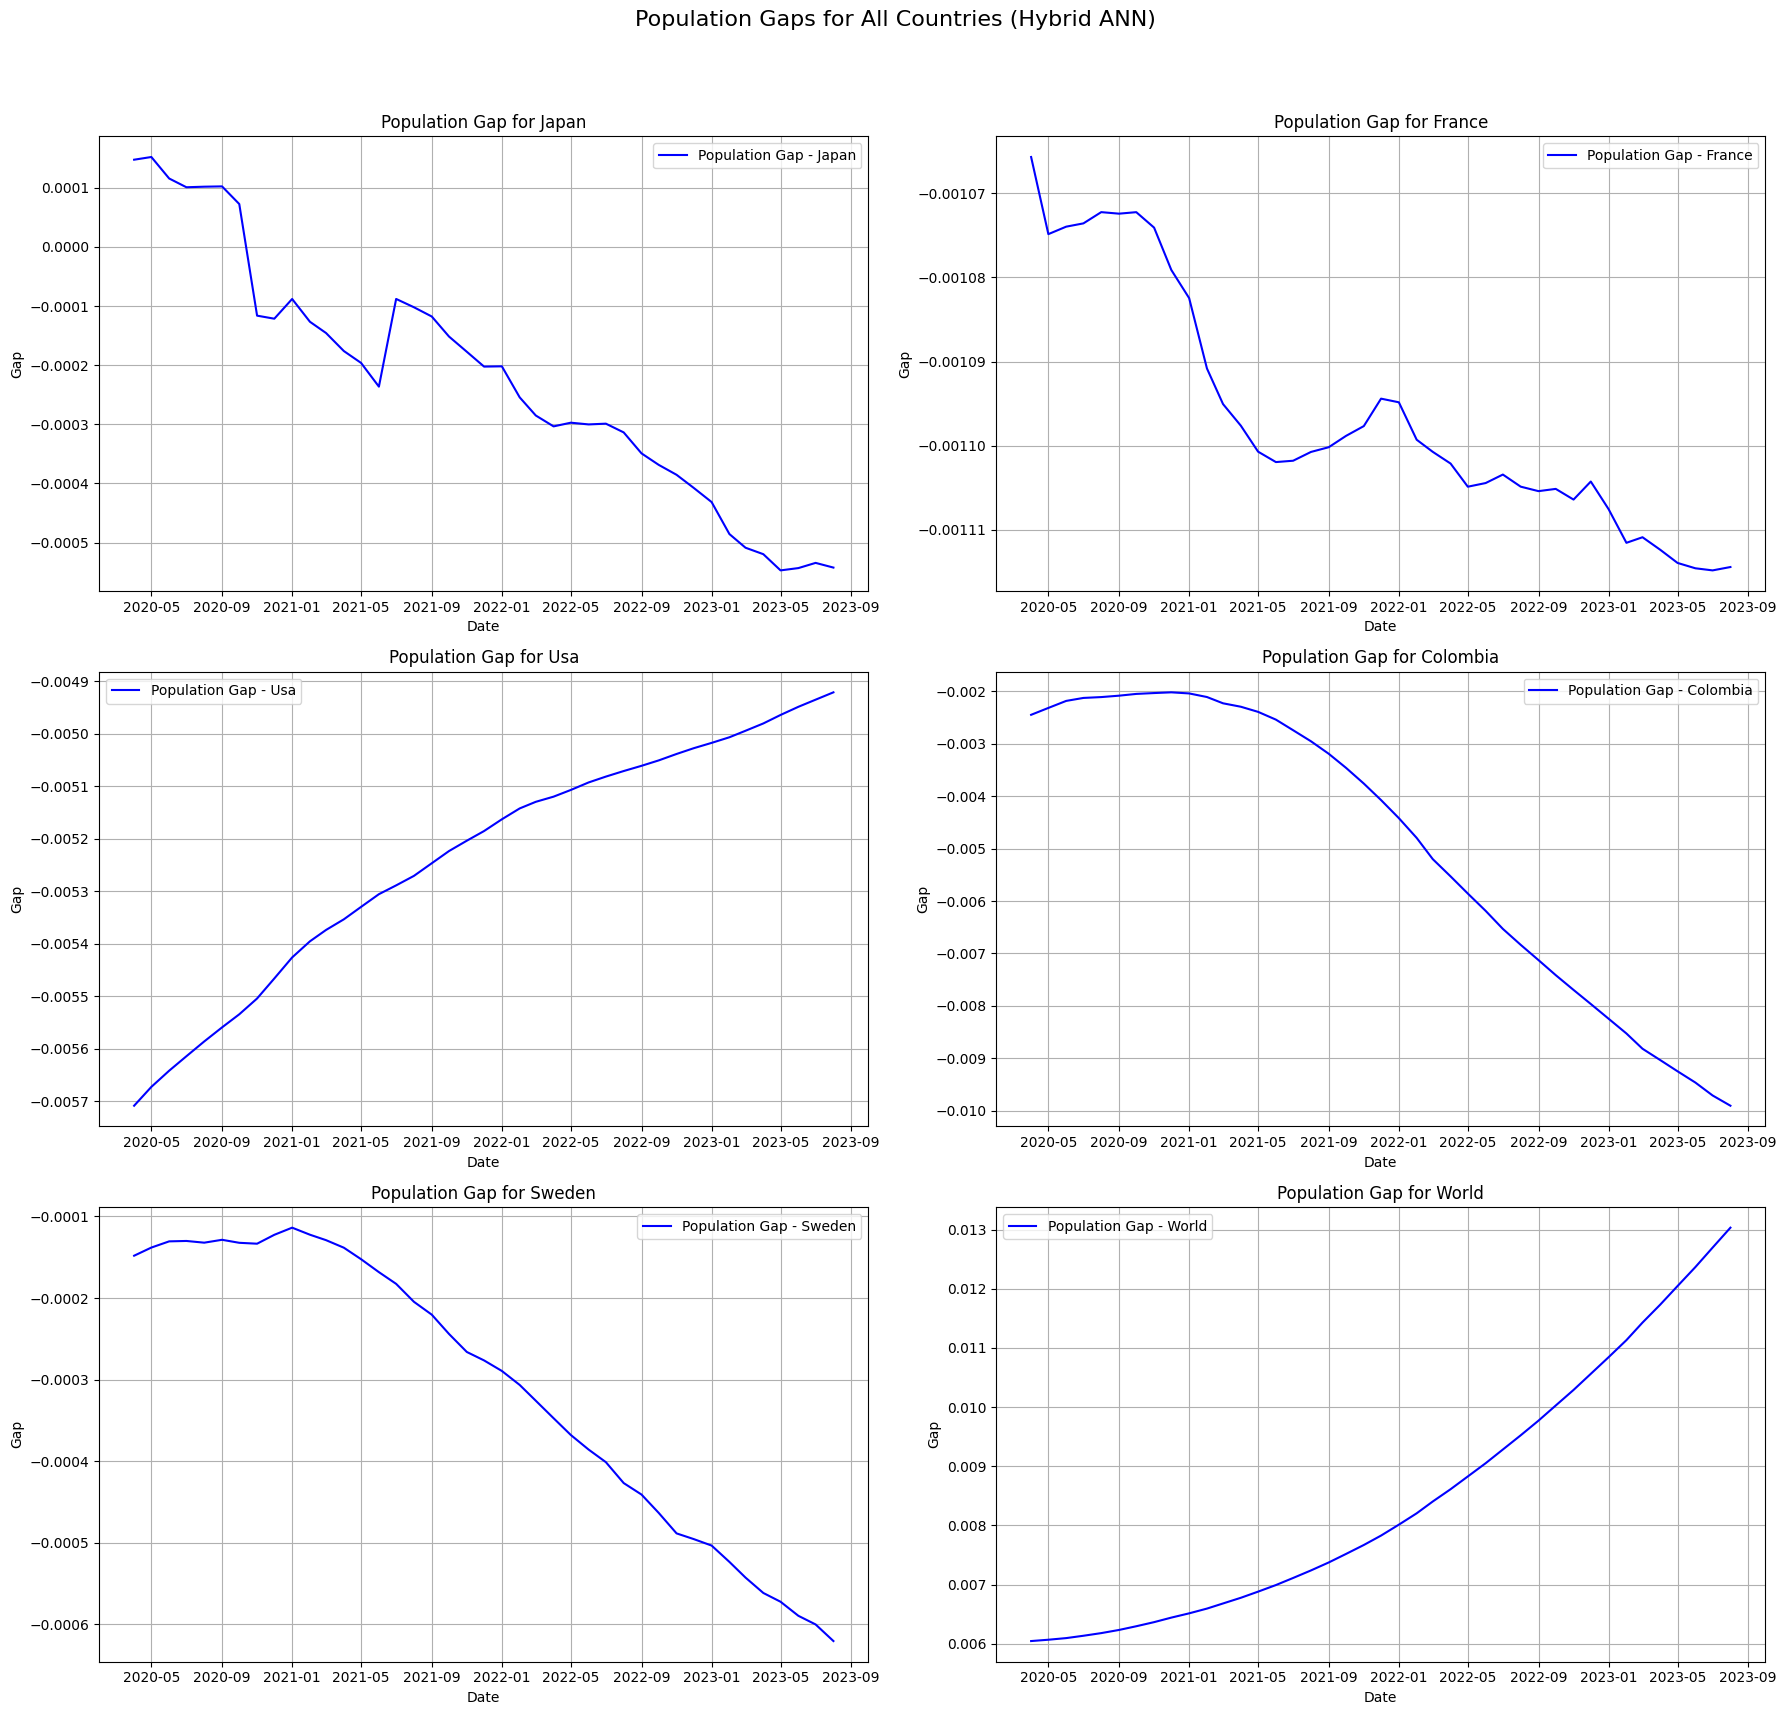

In [ ]:


import matplotlib.pyplot as plt
import math
import pandas as pd

# Assuming 'pop_gap_hybrid_ann' is your DataFrame with population gaps for different countries
num_countries = len(pop_gap_sarimalstm.columns)
num_cols = 2
num_rows = math.ceil(num_countries / num_cols)

plt.figure(figsize=(18, 6 * num_rows))

for idx, column in enumerate(pop_gap_sarimalstm.columns, 1):
    ax = plt.subplot(num_rows, num_cols, idx)
    ax.plot(pop_gap_sarimalstm.index, pop_gap_sarimalstm[column], label=f'Population Gap - {column}', color='blue', )
    ax.set_title(f'Population Gap for {column}')
    ax.set_xlabel('Date')
    ax.set_ylabel('Gap')
    ax.legend()
    ax.grid(True)

plt.suptitle('Population Gaps for All Countries (Hybrid ANN)', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust the layout to make room for the main title
plt.show()


In [ ]:
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

def calculate_forecast_accuracy_metrics(actual, forecast):
    mse = mean_squared_error(actual, forecast)
    mae = mean_absolute_error(actual, forecast)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((actual - forecast) / actual)) * 100
    bias = np.mean(forecast - actual)
    return mse, mae, rmse, mape, bias

# Assuming 'test_s' is the actual data and 'combined_forecasts' contains the forecasts
accuracy_metrics_df = pd.DataFrame(columns=['Country', 'MSE', 'MAE', 'RMSE', 'MAPE', 'Bias'])

for column in combined_forecasts_sarimalstm.columns:
    mse, mae, rmse, mape, bias = calculate_forecast_accuracy_metrics(test_set_sarima_lstm[column], combined_forecasts_sarimalstm[column])
    accuracy_metrics_df = accuracy_metrics_df.append({
        'Country': column,
        'MSE': mse,
        'MAE': mae,
        'RMSE': rmse,
        'MAPE': mape,
        'Bias': bias
    }, ignore_index=True)

# Display the accuracy metrics DataFrame
print(accuracy_metrics_df)


    Country           MSE       MAE      RMSE      MAPE      Bias
0     Japan  9.175799e-08  0.000261  0.000303  0.005413  0.000223
1    France  1.202473e-06  0.001096  0.001097  0.026207  0.001096
2       Usa  2.748419e-05  0.005238  0.005243  0.090173  0.005238
3  Colombia  3.170805e-05  0.004918  0.005631  0.125410  0.004918
4    Sweden  1.241455e-07  0.000309  0.000352  0.013149  0.000309
5     World  7.608202e-05  0.008461  0.008723  0.094158 -0.008461


In [ ]:
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

def calculate_forecast_accuracy_metrics(actual, forecast):
    mse = mean_squared_error(actual, forecast)
    mae = mean_absolute_error(actual, forecast)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((actual - forecast) / actual)) * 100
    bias = np.mean(forecast - actual)
    return mse, mae, rmse, mape, bias

# Assuming 'test_set_sarima_lstm' is the actual data and 'combined_forecasts_sarimalstm' contains the forecasts
accuracy_metrics_df_sarimalstm = pd.DataFrame(columns=['Country', 'MSE', 'MAE', 'RMSE', 'MAPE', 'Bias'])

for column in combined_forecasts_sarimalstm.columns:
    mse, mae, rmse, mape, bias = calculate_forecast_accuracy_metrics(test_set_sarima_lstm[column], combined_forecasts_sarimalstm[column])
    accuracy_metrics_df_sarimalstm = accuracy_metrics_df_sarimalstm.append({
        'Country': column,
        'MSE': mse,
        'MAE': mae,
        'RMSE': rmse,
        'MAPE': mape,
        'Bias': bias
    }, ignore_index=True)

# Display the accuracy metrics DataFrame
print(accuracy_metrics_df_sarimalstm)


    Country           MSE       MAE      RMSE      MAPE      Bias
0     Japan  9.175799e-08  0.000261  0.000303  0.005413  0.000223
1    France  1.202473e-06  0.001096  0.001097  0.026207  0.001096
2       Usa  2.748419e-05  0.005238  0.005243  0.090173  0.005238
3  Colombia  3.170805e-05  0.004918  0.005631  0.125410  0.004918
4    Sweden  1.241455e-07  0.000309  0.000352  0.013149  0.000309
5     World  7.608202e-05  0.008461  0.008723  0.094158 -0.008461


#Model comparison

In [ ]:
import numpy as np
import pandas as pd

# Function to calculate the mean of the exponential of the population gaps
def calculate_mean_exp_population_gap(pop_gap_df):
    mean_exp_gaps = {}
    for country in pop_gap_df.columns:
        mean_exp_gaps[country] = ((pop_gap_df[country]).mean())
    return mean_exp_gaps

# Assuming you have these DataFrames already defined:
# pop_gap_ar_1, pop_gap_arima, population_gap_sarima, pop_gap_hybrid_ann, pop_gap_sarimalstm

# Calculate mean of exponential of population gaps for each model
mean_exp_pop_gap_ar_1 = calculate_mean_exp_population_gap(pop_gap_ar_1)
mean_exp_pop_gap_arima = calculate_mean_exp_population_gap(pop_gap_arima)
mean_exp_population_gap_sarima = calculate_mean_exp_population_gap(population_gap_sarima)
mean_exp_pop_gap_hybrid_ann = calculate_mean_exp_population_gap(pop_gap_hybrid_ann)
mean_exp_pop_gap_sarimalstm = calculate_mean_exp_population_gap(pop_gap_sarimalstm)

# Printing out the results
print("Mean Exp Population Gap AR(1):", mean_exp_pop_gap_ar_1)
print("Mean Exp Population Gap ARIMA:", mean_exp_pop_gap_arima)
print("Mean Exp Population Gap SARIMA:", mean_exp_population_gap_sarima)
print("Mean Exp Population Gap Hybrid ANN:", mean_exp_pop_gap_hybrid_ann)
print("Mean Exp Population Gap SARIMA-LSTM:", mean_exp_pop_gap_sarimalstm)


Mean Exp Population Gap AR(1): {'Japan': -0.005946781803914334, 'France': 0.008373609578884217, 'Usa': -0.00559416209769784, 'Colombia': 0.01731403306998267, 'Sweden': 2.538006870766725e-05, 'World': -0.00020501957055724514}
Mean Exp Population Gap ARIMA: {'Japan': -0.00434341734481882, 'France': -0.015733266997984347, 'Usa': -0.0060852259430377205, 'Colombia': 0.012666521935506951, 'Sweden': -0.0005812806429496459, 'World': 0.005721124363940658}
Mean Exp Population Gap SARIMA: {'Japan': -0.00784682740942721, 'France': -0.0012585443159975028, 'Usa': -0.005374932291677447, 'Colombia': -0.014093593064964919, 'Sweden': 0.0031812932506180788, 'World': 0.005676386086017962}
Mean Exp Population Gap Hybrid ANN: {'Japan': 0.002040006516089585, 'France': 0.035729098784385495, 'Usa': 0.006156734276700647, 'Colombia': -0.06416044118384076, 'Sweden': 0.003206992026379199, 'World': -0.006004599385603444}
Mean Exp Population Gap SARIMA-LSTM: {'Japan': -0.00022267133292651646, 'France': -0.0010964837

In [ ]:
import pandas as pd
import numpy as np

# Function to calculate the mean population gap
def calculate_mean_population_gap(pop_gap_df):
    mean_gaps = {}
    for country in pop_gap_df.columns:
        mean_gaps[country] = pop_gap_df[country].mean()
    return mean_gaps

# Calculate mean population gaps for each model
mean_pop_gap_ar_1 = calculate_mean_population_gap(pop_gap_ar_1)
mean_pop_gap_arima = calculate_mean_population_gap(pop_gap_arima)
mean_pop_gap_sarima = calculate_mean_population_gap(population_gap_sarima)
mean_pop_gap_hybrid_ann = calculate_mean_population_gap(pop_gap_hybrid_ann)
mean_pop_gap_sarimalstm = calculate_mean_population_gap(pop_gap_sarimalstm)

# Combine the mean gaps into a DataFrame for averaging
mean_gaps_df = pd.DataFrame({
    'AR(1)': mean_pop_gap_ar_1,
    'ARIMA': mean_pop_gap_arima,
    'SARIMA': mean_pop_gap_sarima,
    'Hybrid ANN': mean_pop_gap_hybrid_ann,
    'SARIMA-LSTM': mean_pop_gap_sarimalstm
})

# Calculate the average of all models
average_pop_gap_all_models = mean_gaps_df.mean(axis=1)

# Printing out the results
print("Average Population Gap by Country across All Models:")
print(average_pop_gap_all_models)


Average Population Gap by Country across All Models:
Japan      -0.003264
France      0.005203
Usa        -0.003227
Colombia   -0.010638
Sweden      0.001105
World       0.002730
dtype: float64


Certainly! Let's reinterpret the average population gaps you've provided, considering that they represent the differences between the population levels predicted in the absence of COVID-19 and the actual population levels observed during the pandemic:

1. **Japan (-0.003264)**: The more significant negative value compared to the previous interpretation suggests that the models predicted a notably higher population for Japan in the absence of COVID-19 than was actually observed. This implies a potentially larger negative impact of the pandemic on Japan's population growth, leading to a more significant reduction in actual population compared to the no-pandemic scenario.

2. **France (0.005203)**: This positive gap, slightly higher than previously stated, indicates that the actual population in France was more than the predicted population in the absence of COVID-19. This suggests that France's population growth was less affected by the pandemic, or it experienced growth factors during the pandemic that were not anticipated in the absence-of-COVID predictions.

3. **USA (-0.003227)**: A larger negative gap for the USA implies a more substantial overestimation by the models. This suggests that the pandemic had a more pronounced negative impact on the population growth in the USA than previously interpreted.

4. **Colombia (-0.010638)**: This significantly negative value indicates a much larger overestimation of the population by the models. It points to a considerable negative impact of COVID-19 on Colombia's population, possibly due to factors like higher mortality rates or lower birth rates during the pandemic.

5. **Sweden (0.001105)**: The small positive value here suggests a slight underestimation by the models. This implies that the impact of COVID-19 on Sweden's population might have been less severe than anticipated or possibly offset by other factors.

6. **World (0.002730)**: The global population showing a positive gap, albeit smaller than initially interpreted, still suggests that the actual global population was higher than what was predicted in a COVID-free scenario. This might indicate that the overall global population was more resilient to the impacts of the pandemic than expected, possibly due to varying impacts in different regions.

Overall, these revised values suggest a more nuanced and potentially more significant impact of COVID-19 on population trends in the respective regions. Larger absolute values, whether negative or positive, indicate regions where the pandemic's impact was more pronounced compared to the expected trends without the pandemic.

In [ ]:
# Display error metrics for each model

print("Error Metrics for AR(1) Model:")
print(errors_ar1)
print("\n")

print("Error Metrics for ARIMA Model:")
print(errors_arima)
print("\n")

print("Error Metrics for SARIMA Model:")
print(errors_sarima)
print("\n")

print("Error Metrics for Hybrid ANN Model:")
print(accuracy_metrics_df_hybrid_ann)
print("\n")

print("Error Metrics for SARIMA-LSTM Model:")
print(accuracy_metrics_df_sarimalstm)


Error Metrics for AR(1) Model:
    Country           MSE      RMSE       MAE      MAPE      Bias
0     Japan  4.475344e-05  0.006690  0.005947  0.123156  0.005947
1    France  9.278912e-05  0.009633  0.008374  0.200061 -0.008374
2       Usa  5.187554e-05  0.007202  0.006521  0.112240  0.006521
3  Colombia  4.096837e-04  0.020241  0.017314  0.441430 -0.017314
4    Sweden  5.561803e-07  0.000746  0.000613  0.026116 -0.000025
5     World  1.596820e-07  0.000400  0.000335  0.003723  0.000335


Error Metrics for ARIMA Model:
    Country           MSE      RMSE       MAE      MAPE      Bias
0     Japan  2.405608e-05  0.004905  0.004343  0.089950  0.004343
1    France  4.379889e-04  0.020928  0.017589  0.420416  0.017589
2       Usa  4.501930e-05  0.006710  0.006144  0.105746  0.006144
3  Colombia  2.034433e-04  0.014263  0.012677  0.323734 -0.012677
4    Sweden  6.638369e-07  0.000815  0.000648  0.027624  0.000580
5     World  5.532921e-05  0.007438  0.005609  0.062376 -0.005609


Error Metr

In [ ]:
# Combining all error metrics into a single DataFrame
all_errors = pd.DataFrame()

# Adding a 'Model' column to each DataFrame for identification
errors_ar1['Model'] = 'AR(1)'
errors_arima['Model'] = 'ARIMA'
errors_sarima['Model'] = 'SARIMA'
accuracy_metrics_df_hybrid_ann['Model'] = 'Hybrid ANN'
accuracy_metrics_df_sarimalstm['Model'] = 'SARIMA-LSTM'

# Concatenating all DataFrames
all_errors = pd.concat([errors_ar1, errors_arima, errors_sarima, accuracy_metrics_df_hybrid_ann, accuracy_metrics_df_sarimalstm])

# Pivot the DataFrame for better visualization
all_errors_pivot = all_errors.pivot(index='Country', columns='Model', values=['MSE', 'MAE', 'RMSE', 'MAPE', 'Bias'])

# Display the pivoted DataFrame
print(all_errors_pivot)


                   MSE                                                   \
Model            AR(1)         ARIMA Hybrid ANN    SARIMA   SARIMA-LSTM   
Country                                                                   
Colombia  4.096837e-04  2.031006e-04   0.005064  0.000329  3.170805e-05   
France    9.278912e-05  3.746904e-04   0.001912  0.000002  1.202473e-06   
Japan     4.475346e-05  2.405598e-05   0.000009  0.000079  9.175799e-08   
Sweden    5.561803e-07  6.650375e-07   0.000019  0.000025  1.241455e-07   
Usa       3.761557e-05  4.413014e-05   0.000047  0.000034  2.748419e-05   
World     6.031690e-08  5.756466e-05   0.000061  0.000057  7.608202e-05   

               MAE                                             ...      MAPE  \
Model        AR(1)     ARIMA Hybrid ANN    SARIMA SARIMA-LSTM  ...     AR(1)   
Country                                                        ...             
Colombia  0.017314  0.012667   0.064160  0.014098    0.004918  ...  0.441430   
Fran

In [ ]:

# Initialize a DataFrame to store the best model for each country
best_models_per_country = pd.DataFrame(columns=['Country', 'Best Model', 'Lowest RMSE'])

# Iterate over each country to find the model with the lowest RMSE
for country in all_errors_pivot.index:
    min_rmse = float('inf')
    best_model = ''
    for model in all_errors_pivot.columns.levels[1]:  # Iterate over models
        rmse = all_errors_pivot.loc[country, ('RMSE', model)]
        if rmse < min_rmse:
            min_rmse = rmse
            best_model = model

    # Append the best model for this country to the DataFrame
    best_models_per_country = best_models_per_country.append({
        'Country': country,
        'Best Model': best_model,
        'Lowest RMSE': min_rmse
    }, ignore_index=True)

# Display the best model for each country
print(best_models_per_country)


    Country   Best Model  Lowest RMSE
0  Colombia  SARIMA-LSTM     0.005631
1    France  SARIMA-LSTM     0.001097
2     Japan  SARIMA-LSTM     0.000303
3    Sweden  SARIMA-LSTM     0.000352
4       Usa  SARIMA-LSTM     0.005243
5     World        AR(1)     0.000246


In [ ]:

best_models_per_country = pd.DataFrame(columns=['Country', 'Best Model', 'Lowest MSE'])

# Iterate over each country to find the model with the lowest RMSE
for country in all_errors_pivot.index:
    min_rmse = float('inf')
    best_model = ''
    for model in all_errors_pivot.columns.levels[1]:  # Iterate over models
        rmse = all_errors_pivot.loc[country, ('MSE', model)]
        if rmse < min_rmse:
            min_rmse = rmse
            best_model = model

    # Append the best model for this country to the DataFrame
    best_models_per_country = best_models_per_country.append({
        'Country': country,
        'Best Model': best_model,
        'Lowest MSE': min_rmse
    }, ignore_index=True)

# Display the best model for each country
print(best_models_per_country)


    Country   Best Model    Lowest MSE
0  Colombia  SARIMA-LSTM  3.170805e-05
1    France  SARIMA-LSTM  1.202473e-06
2     Japan  SARIMA-LSTM  9.175799e-08
3    Sweden  SARIMA-LSTM  1.241455e-07
4       Usa  SARIMA-LSTM  2.748419e-05
5     World        AR(1)  6.031690e-08


In [ ]:
best_models_per_country = pd.DataFrame(columns=['Country', 'Best Model', 'Lowest Bias'])

# Iterate over each country to find the model with the lowest RMSE
for country in all_errors_pivot.index:
    min_rmse = float('inf')
    best_model = ''
    for model in all_errors_pivot.columns.levels[1]:  # Iterate over models
        rmse = all_errors_pivot.loc[country, ('Bias', model)]
        if rmse < min_rmse:
            min_rmse = rmse
            best_model = model

    # Append the best model for this country to the DataFrame
    best_models_per_country = best_models_per_country.append({
        'Country': country,
        'Best Model': best_model,
        'Lowest Bias': min_rmse
    }, ignore_index=True)

# Display the best model for each country
print(best_models_per_country)


    Country   Best Model  Lowest Bias
0  Colombia        AR(1)    -0.017314
1    France   Hybrid ANN    -0.035729
2     Japan   Hybrid ANN    -0.002040
3    Sweden   Hybrid ANN    -0.003207
4       Usa   Hybrid ANN    -0.006157
5     World  SARIMA-LSTM    -0.008461


In [ ]:
best_models_per_country = pd.DataFrame(columns=['Country', 'Best Model', 'Lowest MSE'])

# Iterate over each country to find the model with the lowest RMSE
for country in all_errors_pivot.index:
    min_rmse = float('inf')
    best_model = ''
    for model in all_errors_pivot.columns.levels[1]:  # Iterate over models
        rmse = all_errors_pivot.loc[country, ('MAPE', model)]
        if rmse < min_rmse:
            min_rmse = rmse
            best_model = model

    # Append the best model for this country to the DataFrame
    best_models_per_country = best_models_per_country.append({
        'Country': country,
        'Best Model': best_model,
        'Lowest MSE': min_rmse
    }, ignore_index=True)

# Display the best model for each country
print(best_models_per_country)


    Country   Best Model  Lowest MSE
0  Colombia  SARIMA-LSTM    0.125410
1    France  SARIMA-LSTM    0.026207
2     Japan  SARIMA-LSTM    0.005413
3    Sweden  SARIMA-LSTM    0.013149
4       Usa  SARIMA-LSTM    0.090173
5     World        AR(1)    0.002284
